# **🥪Predictions model project on obesity🥪**

## **Synopsis**

We know that obesity a plays a huge role by still increasing nowadays worldwide. It's important to know that multiple factors leads to this physical medical condition. Indeed, since 1990, adult obesity worldwide has more than doubled, while obesity among adolescents has multiplied by four. It increased so much that in 2022, 1 in 8 people in the world were living with obesity.

**🍔But what really is obsesity ?🍔**

Overweight and obesity are defined as abnormal or excessive fat (cells) accumulation in the body that presents a risk to health like for instance, cardiovascular diseases, type 2 diabetes or even cancer. Depending on the value of Body Mass Index (BMI), it can corresponds to the obesity(>30), overweight(>25) or even underweight(< 18.5) status. The BMI is present on the dataset that we will use.

Indeed, the dataset that we will use is a dataset containing several classes that contributes to the increase of weight while other help in decreasing the weight depending on the life style like eating habit, diet and exercices.

Hence here is a presentation of our dataset with the differents columns:

The data contains `17` attributes and `2111` records.

*   `Gender`: Feature, Categorical, "Gender"

*   `Age` : Feature, Continuous, "Age"-

* `Height`: Feature, Continuous

* `Weight`: Feature Continuous

* `family_history_with_overweight`:
Feature, Binary, " Has a family member suffered or suffers from overweight? "

* `FAVC` : Feature, Binary, " Do you eat high caloric food frequently? "

* `FCVC` : Feature, Integer, " Do you usually eat vegetables in your meals? "

* `NCP` : Feature, Continuous, " How many main meals do you have daily? "

* `CAEC` : Feature, Categorical, " Do you eat any food between meals? "

* `SMOKE` : Feature, Binary, " Do you smoke? "

* `CH2O`: Feature, Continuous, " How much water do you drink daily? "

* `SCC`: Feature, Binary, " Do you monitor the calories you eat daily? "

* `FAF`: Feature, Continuous, " How often do you have physical activity? "

* `TUE` : Feature, Integer, " How much time do you use technological devices such as cell phone, videogames, television, computer and others? "

* `CALC` : Feature, Categorical, " How often do you drink alcohol? "

* `MTRANS` : Feature, Categorical, " Which transportation do you usually use? "

* `NObeyesdad` : Target, Categorical, "Obesity level"

We will make a machine model and some neural networks models in order to predict the obesity classes after doing some training on some dataset that will allow our model to learn the patterns in order to do predictions for the levels of obesity.

The obseity and overweight rate arround the world is still grows until at this moment. This is really concerning !

Studying such a dataset can be useful in understanding the factors contributing to obesity, especially for researchers, healthcare professionals and even for us.

This awareness facilitates targeted interventions, including dietary modifications, increased physical activity, and appropriate medical guidance.

Additionally, analyzing this data can improve machine learning models for predicting obesity trends and supporting early intervention efforts. Indeed, it will help us identify patterns and risk factors associated with different obesity levels.

That's why, our main purpose/goal of predicting obesity levels is to identify individuals at risk and try implement preventive measures.

Effectively, identifying obesity risk at an early stage allows individuals to take preventives measures before severe health complications to develop such as for instances:

*   Diet
*   Physical activity
*   Medical guidance
*   Sleeping quality
*   Screen time

and so on...

🎎 Warning : not every existing factors are present and taken in account for the obesity level in this dataset.

So, at the end of the day, I am just a guy that want to see what does contribute to obesity and not for espcially ⚕medical purposes⚕.




## **1. Prepare/clean the data for exploratory analysis purposes**

### **1. Importation of the necessary packages for the data analysis**

In [ ]:
# We import all the neccessary packages in order to analyse the data

# librairies Modeling & preprocessing import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.metrics import mean_squared_error, classification_report, \
ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split

# librairies for categorical/numerical pipelines, scaling and encoding
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer,make_column_transformer,make_column_selector

# Librairies for classical machine learning models
from sklearn.ensemble import RandomForestRegressor , RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

# performances metrics for model
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay, f1_score

# Model Tuning
from sklearn.model_selection import GridSearchCV

# For model evaluation (using Regression metrics)
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

# librairies for Neural Network and to construct the models
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU


### **2. Loading the obesity's data**

In [ ]:
path = '/content/drive/MyDrive/CSV/obesitydataset.csv'

In [ ]:
# We load the datafile as panda dataframe
df = pd.read_csv(path)

### **3. Preview and informations about the data**

In [ ]:
# To preview the first five data of the dataframe
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# To preview the first five data of the dataframe
df.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3.0,3.0,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
# Choosing a specific data to get information for fun on it
df.loc[[25]]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
25,20.0,Male,1.6,50.0,no,no,2.0,4.0,no,yes,2.0,yes,3.0,2.0,Frequently,Public_Transportation,Normal_Weight


In [ ]:
# We want to get informations on the dataframe (datatypes, Number of columns, rows)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

### **4. Handling the missing values**

In [ ]:
# We check for the presence of missing data (NaN values)
df.isna().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


In [ ]:
# Another way to check missing values, same as isna()
df.isnull().sum()

,0
Age,0
Gender,0
Height,0
Weight,0
CALC,0
FAVC,0
FCVC,0
NCP,0
SCC,0
SMOKE,0


The following is just for missing values vizualisation

<Axes: >

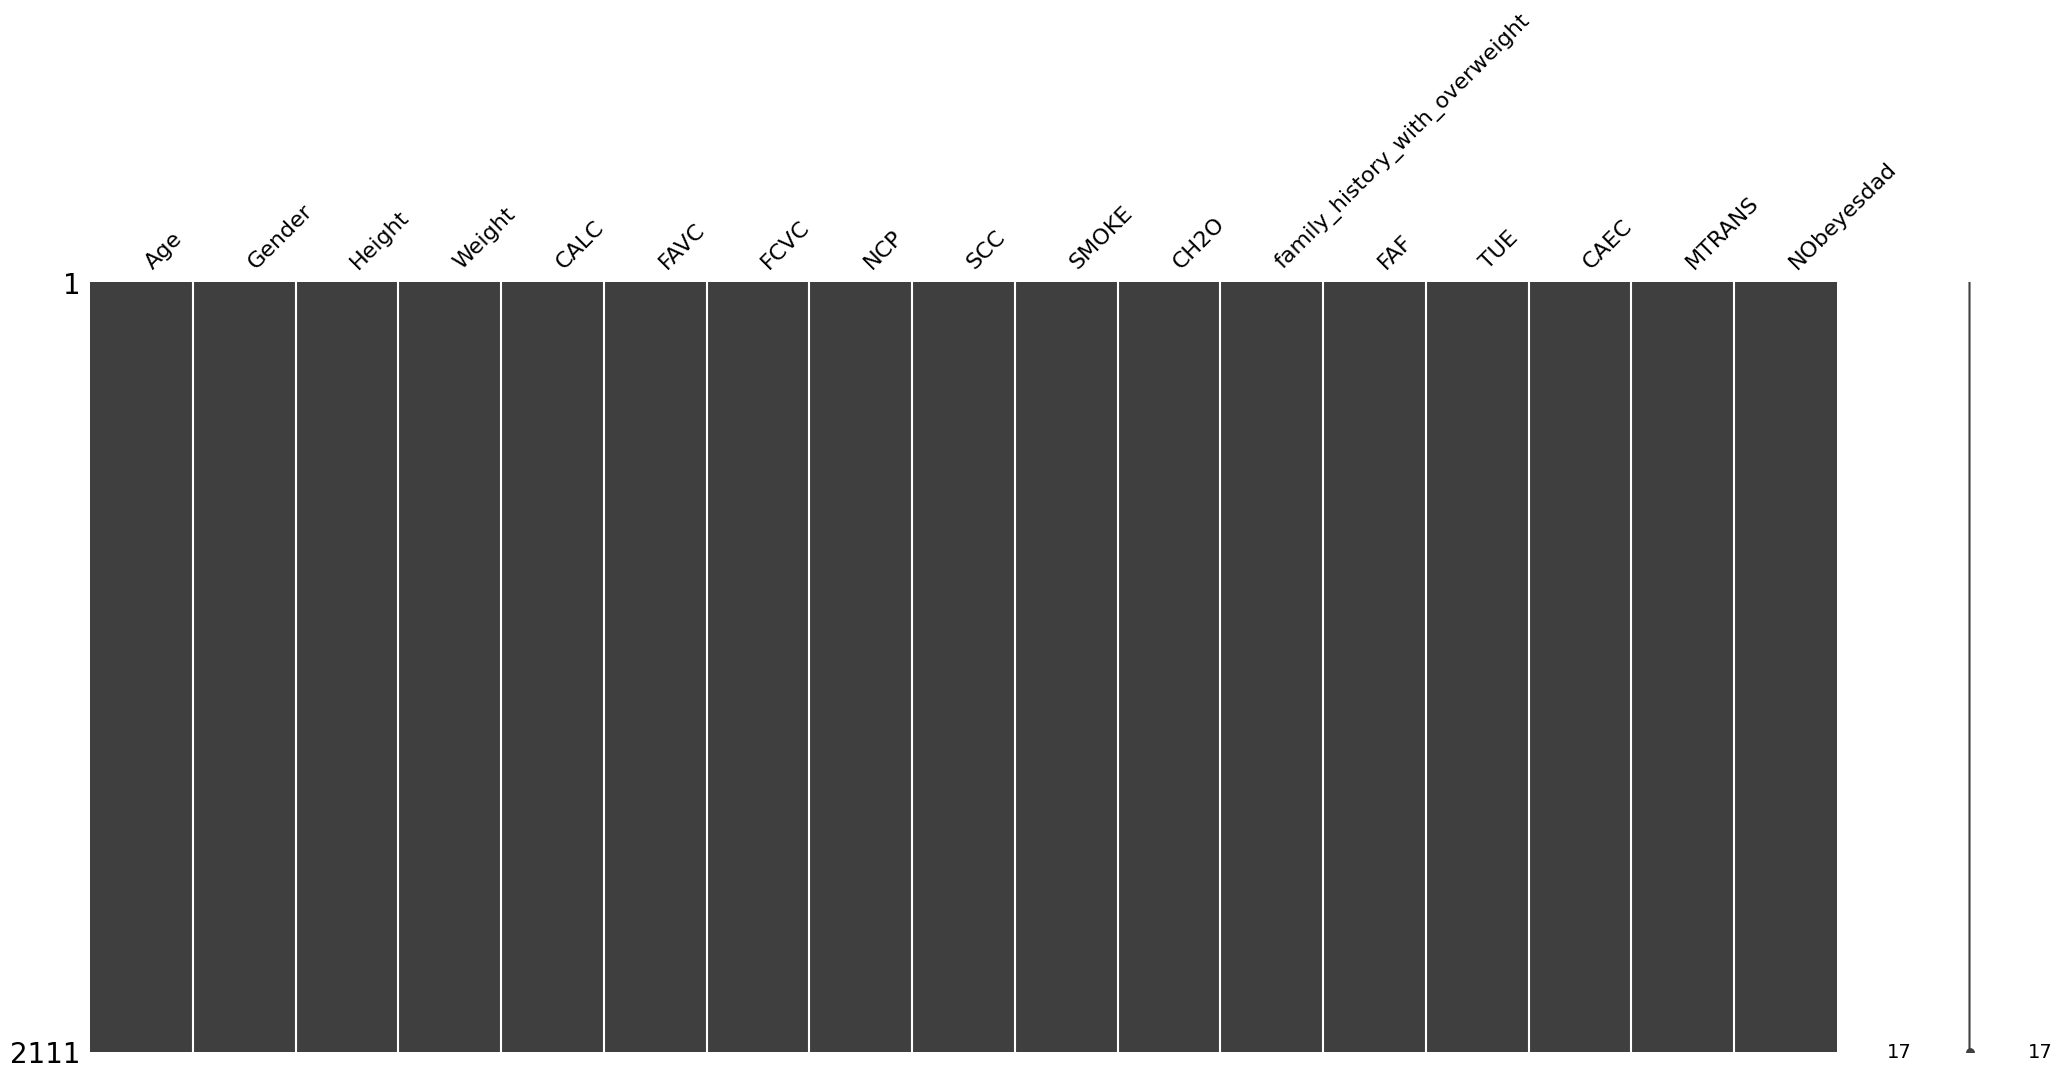

In [ ]:
# Just for Visualizing that there is no missing values in the dataset using a matrix plot
import missingno as msno
msno.matrix(df) # Matrix of vizualisation using panda dataframe

There is no white, then no missing values like we saw and checked before.

### **5. Unique count for each columns**

In [ ]:
# We count the number of unique values for the entire dataframe for each column
df.nunique()

,0
Age,1402
Gender,2
Height,1574
Weight,1525
CALC,4
FAVC,2
FCVC,810
NCP,635
SCC,2
SMOKE,2


In [ ]:
# We can count the number of unique values of "NObeyesdad" only
df['NObeyesdad'].nunique()

7

In [ ]:
# But we are interested more in checking what are these unique of "NObeyesdad", then :
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

### **6. Renaming non-explicit column name**

Some people seeing the class NObeyesdad wouldn't know to what it's really corresponds to.
Actually, NObeyesdad corresponds to the obesity level. We will rename it to get more clarity that this class/column corresponds to the obesity level.

In [ ]:
# Renaming "NObeyesdad" into "ObesityLevel"
df.rename(columns={'NObeyesdad': 'ObesityLevel'}, inplace=True)

We use head() function to check with the first five data (rows) of the dataframe if the renaming has been correctly applied.

In [ ]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,ObesityLevel
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


The renaming have corretly taken in account from NObeyesdad to ObesityLevel.

### **7. Handling the duplicates rows**

In [ ]:
# Another function that we can use to be sure of presence of duplicated values or not
df.duplicated().any()

True

In [ ]:
# We also check for the presence of duplicated values
df.duplicated().sum()

24

We have only 24 duplicated rows among 2111 rows making the number of duplicated rows is considerably low. So, it may be good tought to drop them.

In [ ]:
# Let's drop the duplicated rows
df = df.drop_duplicates()

We now check if the are no duplicated anymore in our dataset :

In [ ]:
# Another function that we can use to be sure of presence of duplicated values or not
df.duplicated().any()

False

It show us False, so no duplicated rows anymore ! ✅

We decided to drop the duplicates rows because they introduce redundancy in our data and for the future learning models. We did so, since 24 rows among 2111 rows to drop will not be a huge impact and loss of data. Plus, they are duplicated rows...

They may represent multiple same individuals that have taken the survey/ participated on this data.

## **2. Data preparation for modeling**
### **1. Data preprocesing for our models**

In [ ]:
# @title Preparation of the data for deep learning model training and evaluation

# We define X and y and complete the train test split to avoid data leakage

X = df.drop(columns = 'ObesityLevel') # the features, what we will use to predict
y = df['ObesityLevel'] # what we want to predict, the target

# Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

We have began to split the data into training set and testing set (one for training the model and one for testing its performance on unseen data). This splitting allows us to avoid any data leakage which would influence the model's test part.

In [ ]:
# We check the shape/form of the X_train which excatly correspond to 75 % of the data (it's then 3 times the X_Test size)
X_train.shape

(1565, 16)

In [ ]:
# We check the shape/form of the X train which exactly correspond to 25 % of the data
X_test.shape

(522, 16)

To calculate the percentage of the train data and test data since we haven't specified the test size or the train size :

In [ ]:
# We can check the features of the data for the training set
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1565 entries, 1347 to 881
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1565 non-null   float64
 1   Gender                          1565 non-null   object 
 2   Height                          1565 non-null   float64
 3   Weight                          1565 non-null   float64
 4   CALC                            1565 non-null   object 
 5   FAVC                            1565 non-null   object 
 6   FCVC                            1565 non-null   float64
 7   NCP                             1565 non-null   float64
 8   SCC                             1565 non-null   object 
 9   SMOKE                           1565 non-null   object 
 10  CH2O                            1565 non-null   float64
 11  family_history_with_overweight  1565 non-null   object 
 12  FAF                             1565 

In [ ]:
# So, the features of the data for the training set
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 522 entries, 1337 to 1269
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             522 non-null    float64
 1   Gender                          522 non-null    object 
 2   Height                          522 non-null    float64
 3   Weight                          522 non-null    float64
 4   CALC                            522 non-null    object 
 5   FAVC                            522 non-null    object 
 6   FCVC                            522 non-null    float64
 7   NCP                             522 non-null    float64
 8   SCC                             522 non-null    object 
 9   SMOKE                           522 non-null    object 
 10  CH2O                            522 non-null    float64
 11  family_history_with_overweight  522 non-null    object 
 12  FAF                             522 n

In [ ]:
# We can check the target of the data for the training set
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1565 entries, 1347 to 881
Series name: ObesityLevel
Non-Null Count  Dtype 
--------------  ----- 
1565 non-null   object
dtypes: object(1)
memory usage: 24.5+ KB


In [ ]:
# So, the target of the data for the training set
y_test.info()

<class 'pandas.core.series.Series'>
Index: 522 entries, 1337 to 1269
Series name: ObesityLevel
Non-Null Count  Dtype 
--------------  ----- 
522 non-null    object
dtypes: object(1)
memory usage: 8.2+ KB


In [ ]:
# The total dataset
total_data = len(X_train) + len(X_test)

# The percentage of samples in X_train
X_train_percentage = (len(X_train) / total_data) * 100

# The percentage of samples in X_test
X_test_percentage = (len(X_test) / total_data) * 100

# Then the percentages becomes
print(f"X_train Percentage: {X_train_percentage:.2f}%")
print(f"X_test Percentage: {X_test_percentage:.2f}%")

X_train Percentage: 74.99%
X_test Percentage: 25.01%


We have :

* X_Train has a shape (1572, 17)
* X_Test has a shape (524, 17)

So, we have then have in our entire dataset :

* X_Train = `74.99 %`
* X_Test = `25.01 %`

Those values are common learning case.

This means we have gotten a good distribution of data because we are providing enough data for the model to learn (`74.99 %`) and some decent unseen data for testing the model(`25.01 %`)

In [ ]:
# To check classes balance
y_train.value_counts(normalize=True)

,proportion
ObesityLevel,
Obesity_Type_I,0.169968
Obesity_Type_III,0.157827
Overweight_Level_II,0.148882
Obesity_Type_II,0.137380
Normal_Weight,0.131629
Overweight_Level_I,0.130990
Insufficient_Weight,0.123323


This helps us to understand if the dataset is balanced, meaning if there are roughly equal proportions of each obesity level, or imbalanced, meaning some obesity levels are significantly more represented than others.

The targets proportions are somewhat balalanced so there will no be dominance issue during the training part. Indeed, class imbalance can negatively affect the performance of machine learning models. If one class is heavily over-represented, the model might become biased towards that class and perform poorly on the under-represented classes.

In our case, we will no have this issue because the differents classes of obesity are more or less balanced. If there was imbalances it may pose a problem for the learning model which would perform better on the majority class due to the high presence compared to minority ones. (It's not a issue that matter that much, it's simply that our models will train more on some class than others).

**By the way, we remark that our target ObesityLevel is a multiclass categorical variable so we have to use a machine learning model that supports multiclass classification.**

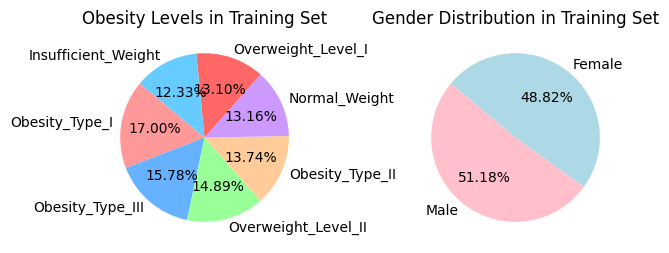

In [ ]:
# @title Some Pie vizualisation of the differents classes (obesity level, gender)
# Pie Chart 1: Distribution of Obesity Levels in the Training Set
plt.subplot(1, 2, 1)
obesity_level_counts = y_train.value_counts()
obesity_levels = obesity_level_counts.index.tolist()
counts = obesity_level_counts.tolist()

# Define the colors
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#CC99FF', '#FF6666', '#66CCFF']

plt.pie(counts, labels=obesity_levels, colors=colors, autopct='%0.2f%%', startangle=140)
plt.title("Obesity Levels in Training Set")

# Pie Chart 2: Distribution of Categorical Feature: Gender
plt.subplot(1, 2, 2)
if 'Gender' in df.columns:
  gender_counts = X_train['Gender'].value_counts()
  genders = gender_counts.index.tolist()
  counts_gender = gender_counts.tolist()

  # Define the colors
  colors_gender = ['#FFC0CB', '#ADD8E6']

  plt.pie(counts_gender, labels=genders, colors=colors_gender, autopct='%0.2f%%', startangle=140)
  plt.title("Gender Distribution in Training Set")
else:
  print("Warning: 'Gender' column not found in the DataFrame.")

plt.tight_layout()  # Adjust subplot parameters for a tight layout.
plt.show()

### **2. Implementation of a preprocessing pipeline**

In [ ]:
# create preprocessor

# We selects the columns by their data type and separate them
cat_select = make_column_selector(dtype_include='object') # Creating a categorical data selector
num_select = make_column_selector(dtype_include='number') # Creating a numeric data selector

# Normalization of the features / Instantiating the Transformers
scaler = StandardScaler()

# Categorical features need to be encoded
# We transform categorical features into numerical such that
# machine learning model understand.
# Instantiating the encoder

ohe = OneHotEncoder(handle_unknown='ignore')

# Defining a tuple for each pathway
num_tuple = ('num', scaler, num_select)
cat_tuple = ('cat', ohe, cat_select)

# preprocessing pipeline
processor = ColumnTransformer([num_tuple, cat_tuple], remainder='passthrough')

**We have done in the previous lines :**

1.   Identifying the categorical and numerical columns.
2.   Applying one-hot encoding to categorical columns in order to change categorical/objects into numerical values (binary: 0 or 1 )
3.   Applying StandardScaler to numerical values in order to normalize them (each feature will have a mean of 0 and a standard deviation/variance of 1)
4.   Combinaison of these transformations into a single preprocessing pipeline using ColumnTransformer which can then be applied on our dataset.

This are necessary for the machine learning models, because machine learning models often require numerical input and categorical features, by their nature, are not numerical (use of One Hot Encoder).

On the other hand, StandardScaler prevents the feature dominance problem that is to say, some features maay have large numerical values range like Age or the Weight for instance. That's why we must normalize the features using StandardScaler which brings a certain equilibrium between the differents numerical(float or int datatype) features.

Whereas, the column transformer allows to keeps all the previous preprocessing steps in only one tuple avoiding any data leakage to occurs.



In [ ]:
# @title Model's evaluation function
# Define a function to evaluate models
labels=['Insufficient_Weight', 'Normal_Weight', 'Obesity_Type_I',
        'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']
def evaluate_classification(y_true, y_predicted, average=None):
  accuracy = accuracy_score(y_true, y_predicted)
  recall = recall_score(y_true, y_predicted, average=None)
  precision = precision_score(y_true, y_predicted, average=None)
  f1 = f1_score(y_true, y_predicted, average=None)
  print(f'Accuracy: {accuracy}')
  for i, label in enumerate(labels):
    print(f'Recall for {label}: {recall[i]:.3f}')
  for i, label in enumerate(labels):
    print(f'Precision for {label}: {precision[i]:.3f}')
  for i, label in enumerate(labels):
    print(f'f1_score for {label}: {f1[i]:.3f}')

In [ ]:
# Process the data
X_train_processed = processor.fit_transform(X_train)
X_test_processed = processor.transform(X_test)

## **3. Applications of classical machine learning models**

### **1. Classical Machine learning model : eXtreme Gradient Boosting (XGBOOST)**

In [ ]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder on the training target labels and transform them
y_train_encoded = label_encoder.fit_transform(y_train)

# Transform the test target labels using the fitted encoder
y_test_encoded = label_encoder.transform(y_test)

# Create an XGBoost classifier
model_xgb = xgb.XGBClassifier(random_state=42)

# Train the model on the processed training data with encoded labels
model_xgb.fit(X_train_processed, y_train_encoded)

# Make predictions on the processed test data
y_pred_xgb = model_xgb.predict(X_test_processed)

# Make predictions on the processed train data
y_pred_train_xgb = model_xgb.predict(X_train_processed)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
print(f"Accuracy: {accuracy}")

Accuracy: 0.975095785440613


Above,as before we have used the label encoder in order to categorical(object) values into numerical values(integer, float) because, again, the machine/deep learning models need numerical imputs to be able to work. Compared to before, here the only difference is the fact that we applied Label Encoder on the targets.

For the test part, the Accuracy is quite high making this a good sign for a well performing model.

In [ ]:
# Get the classification metrics for XGBoost
print('Training Metrics for XGBoost\n')
evaluate_classification(y_train_encoded, y_pred_train_xgb)

print('\n')

print('Testing Metrics for XGBoost\n')
evaluate_classification(y_test_encoded, y_pred_xgb)

Training Metrics for XGBoost

Accuracy: 1.0
Recall for Insufficient_Weight: 1.000
Recall for Normal_Weight: 1.000
Recall for Obesity_Type_I: 1.000
Recall for Obesity_Type_II: 1.000
Recall for Obesity_Type_III: 1.000
Recall for Overweight_Level_I: 1.000
Recall for Overweight_Level_II: 1.000
Precision for Insufficient_Weight: 1.000
Precision for Normal_Weight: 1.000
Precision for Obesity_Type_I: 1.000
Precision for Obesity_Type_II: 1.000
Precision for Obesity_Type_III: 1.000
Precision for Overweight_Level_I: 1.000
Precision for Overweight_Level_II: 1.000
f1_score for Insufficient_Weight: 1.000
f1_score for Normal_Weight: 1.000
f1_score for Obesity_Type_I: 1.000
f1_score for Obesity_Type_II: 1.000
f1_score for Obesity_Type_III: 1.000
f1_score for Overweight_Level_I: 1.000
f1_score for Overweight_Level_II: 1.000


Testing Metrics for XGBoost

Accuracy: 0.975095785440613
Recall for Insufficient_Weight: 0.946
Recall for Normal_Weight: 0.934
Recall for Obesity_Type_I: 0.988
Recall for Obesity

<Figure size 1600x800 with 0 Axes>

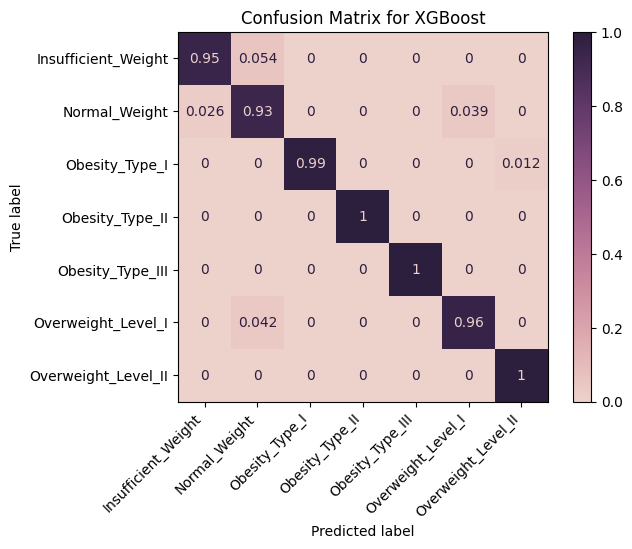

                     precision    recall  f1-score   support

Insufficient_Weight       0.97      0.95      0.96        74
      Normal_Weight       0.91      0.93      0.92        76
     Obesity_Type_I       1.00      0.99      0.99        85
    Obesity_Type_II       1.00      1.00      1.00        82
   Obesity_Type_III       1.00      1.00      1.00        77
 Overweight_Level_I       0.96      0.96      0.96        71
Overweight_Level_II       0.98      1.00      0.99        57

           accuracy                           0.98       522
          macro avg       0.97      0.98      0.97       522
       weighted avg       0.98      0.98      0.98       522



In [ ]:
# Plot the confusion matrix for XGBoost
plt.figure(figsize=(16, 8))
ConfusionMatrixDisplay.from_estimator(
    model_xgb, X_test_processed, y_test_encoded,
    display_labels = label_encoder.classes_,
    cmap=sns.cubehelix_palette(as_cmap=True),
    normalize='true',)
plt.xticks(rotation=45, ha='right')
plt.title("Confusion Matrix for XGBoost")
plt.show()
# Print the classification report for XGBoost
print(classification_report(y_test_encoded, y_pred_xgb, target_names = label_encoder.classes_))

### **2. Classical Machine learning model : K-Nearest Neighbor (K-NN)**

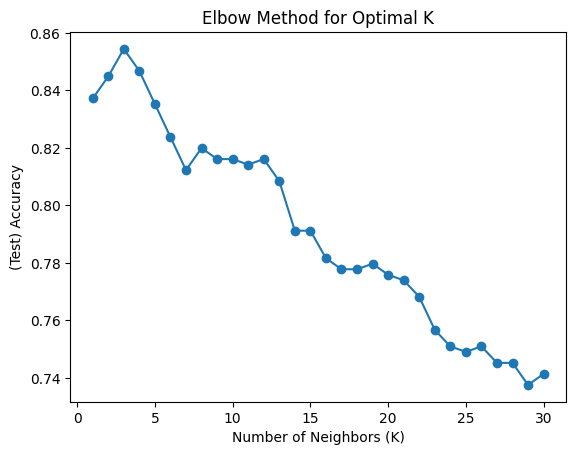

Optimal k: 3


In [ ]:
# @title Finding the optimal nearest neighbors for K-NN
# Range of k values to test
k_range = range(1, 31)

# Store test accuracies
test_accuracies = []

# Calculate test accuracies for each k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_processed, y_train)
    y_pred = knn.predict(X_test_processed)
    test_accuracies.append(accuracy_score(y_test, y_pred))

# Plot the results
plt.plot(k_range, test_accuracies, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('(Test) Accuracy')
plt.title('Elbow Method for Optimal K')
plt.show()

# Find the optimal k (this is just a suggestion - manually inspect the plot)
optimal_k = k_range[test_accuracies.index(max(test_accuracies))]

# Retrain the model with the optimal k
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train_processed, y_train)

print(f"Optimal k: {optimal_k}")

We can see that the optimal number of neighbors is k = 3 by using elbow method which consist on a plot of any metrics(here test accuaracy) in function of the number of neighbors. Let's apply K-NN for 3 nearest neighbors because it gives the highest test accuracy.

In [ ]:
# Make a knn model
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fit the model
knn.fit(X_train_processed,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Get predictions
train_pred_knn = knn.predict(X_train_processed)
test_pred_knn = knn.predict(X_test_processed)

In [ ]:
# Get the classification metrics
print('Training Metrics\n')
evaluate_classification(y_train, train_pred_knn)

print('\n')

print('Testing Metrics\n')
evaluate_classification(y_test, test_pred_knn)

Training Metrics

Accuracy: 0.9220447284345048
Recall for Insufficient_Weight: 0.990
Recall for Normal_Weight: 0.660
Recall for Obesity_Type_I: 0.974
Recall for Obesity_Type_II: 0.986
Recall for Obesity_Type_III: 1.000
Recall for Overweight_Level_I: 0.878
Recall for Overweight_Level_II: 0.936
Precision for Insufficient_Weight: 0.816
Precision for Normal_Weight: 0.895
Precision for Obesity_Type_I: 0.935
Precision for Obesity_Type_II: 0.986
Precision for Obesity_Type_III: 1.000
Precision for Overweight_Level_I: 0.905
Precision for Overweight_Level_II: 0.905
f1_score for Insufficient_Weight: 0.895
f1_score for Normal_Weight: 0.760
f1_score for Obesity_Type_I: 0.954
f1_score for Obesity_Type_II: 0.986
f1_score for Obesity_Type_III: 1.000
f1_score for Overweight_Level_I: 0.891
f1_score for Overweight_Level_II: 0.920


Testing Metrics

Accuracy: 0.8544061302681992
Recall for Insufficient_Weight: 0.959
Recall for Normal_Weight: 0.382
Recall for Obesity_Type_I: 0.976
Recall for Obesity_Type_II

<Figure size 1600x800 with 0 Axes>

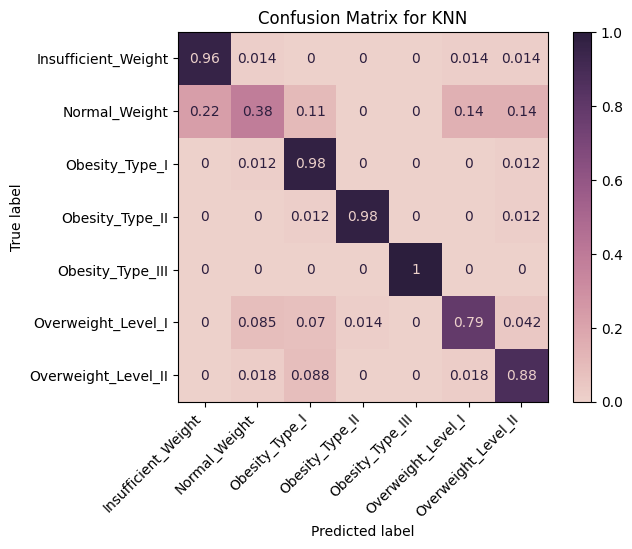

                     precision    recall  f1-score   support

Insufficient_Weight       0.81      0.96      0.88        74
      Normal_Weight       0.76      0.38      0.51        76
     Obesity_Type_I       0.81      0.98      0.89        85
    Obesity_Type_II       0.99      0.98      0.98        82
   Obesity_Type_III       1.00      1.00      1.00        77
 Overweight_Level_I       0.81      0.79      0.80        71
Overweight_Level_II       0.75      0.88      0.81        57

           accuracy                           0.85       522
          macro avg       0.85      0.85      0.84       522
       weighted avg       0.85      0.85      0.84       522



In [ ]:
# Plot the confusion matrix for KNN
plt.figure(figsize=(16, 8))
ConfusionMatrixDisplay.from_predictions(
    y_test, test_pred_knn,
    display_labels = knn.classes_,
    cmap=sns.cubehelix_palette(as_cmap=True),
    normalize='true'
)
plt.xticks(rotation=45, ha='right')
plt.title("Confusion Matrix for KNN")
plt.show()

# Print the classification report for KNN
print(classification_report(y_test, test_pred_knn, target_names=knn.classes_))

Both models are giving quite high accuracies (accuracy score), that means they are good classical machine learning model. But we need to evaluate them more in depth, even tough the accuracy is already a good indicator for the best performing model :

**On the test set :**

* XGOOST Test Accuracy: `0.975095785440613 = 97.51 %`
* K-NN Test  Accuracy: `0.8544061302681992 = 85.44 %`


By evaluating the 2 classical learning models, XGBOOST does better job than the K-NN algorithm for 1 or 3 neighbors based on the evaluation by the metrics. Like Random Forest and in particular Decision Tree, the eXtrem Gradient Boosting (XGBOOST) is a tree based machine learning method(ensemble of method of decision trees) for both regression and multi-class classification. (K-NN is also applicable for both regression and multi-class classifciation)

However, in terms of predictions performance XGBOOST outclass the other machine learning model like K-NN. Since, we have a multi-class classification with 7 classes, K-NN whose performance relies heavily on the distance might be struggling to find relevant neighbors. As a consequence, its performance can degrades as the number of classes increases. Furthermore, due to our quite large dataset, K-NN would be a bit computationally expensive because it need to compute all the distances between the differents datapoints. Those are maybe the reasons of the lower performance showed by the differents evaluation metrics.

*It may actually be not that relevant to have used K-NN for our multi-class classification problem with 7 classes.*

In fact, 2087 entries is huge but not compared to many other dataset that has more than 20 000 entries, the missclassification might come from something else, like from the data itself.







### **3. Comparaison between K-NN and XGBOOST machine learning models :**

**We know that the differents metrics are :**

Accuracy :

`accuracy = (true positives + true negatives) / (total predictions)`

$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

Precision :

`precision = true positives / (true positives + false positives)`

$precision = \frac{TP}{TP + FP}$

Recall :

`recall = true positives / (true positives + false negatives)`

$recall = \frac{TP}{TP + FN}$

F1-Score :

`F1-score = 2 * (precision * recall) / (precision + recall)`

$F1_{\text{score}} = 2 \cdot \frac{\left(\frac{TP}{TP + FP}\right) \times \left(\frac{TP}{TP + FN}\right)}{\frac{TP}{TP + FP} + \frac{TP}{TP + FN}}$

Where :

- **True Positive (TP):** Our model correctly identifies a positive(predicted label) case when the actual outcome is positive (true label).  
- **True Negative (TN):** Our model correctly identifies a negative case when the actual outcome is negative.  
- **False Positive (FP):** Our model incorrectly classifies a negative case as positive, meaning it detects something(a obesity category) that isn’t actually exisist. It's also called Type I error.  
- **False Negative (FN):** Our model fails to detect a positive case, mistakenly classifying it as negative. It's also called Type II error.

This is the reasoning for a 2x2 confusion matrix but it's the same for multi class classification.

**Example of a False Positive (FP) for obesity multi class:**

In this case, a False Positive (FP) means the model predicts a specific obesity level for an individual, but that prediction is actually incorrect. In consequence, the person in fact, belongs to a different obesity level.

Let's take the Normal weight obesity level as true label, if our machine learning model predicts Overweight Level (I and II) for example. We would have a False Positive for Overweight Level I or Overweight Level II, because the model incorrectly identified the person as belonging to the Overweight Level I or Overweight Level II category when they actually have a Normal Weight. Thus, the model had incorrectly classified a negative class(Overweight Level I or Overweight Level II) as positive.


We will use those metrics to understand about the number of TP, TN, FP and FN of our model predictions.

--------------------------------------------------------------------------------
We have plotted the confusion matrices of the two models because it allow us to evaluate the performance of our classification model. Indeed, it provides a detailed breakdown of the model's predictions compared to the actual outcomes, helping us to identify where the model is making errors or not.


And since, we have a multi-class classification problems, that matrix is particularly useful to see the differents miss-classifications/predictions errors. ➡ Since we have 7 classes, the confusion matrix is a 7x7 size matrix

By looking at the values of the metrics and in particular the confusion matrix which is helpful in vizualising the predictions made by our model.

The K-NN model is struggling in the predictions, especially by looking the confusion matrix. We can observe that the K-NN is wrestling to do correct predictions looking at the diagonal values which consists on the true positives corresponding to the correct predictions of the machine learning model.

Indeed, overall, K-NN is worse at giving predictions for the differents obesity classes, in particular for the Normal Weight (`38%`)and Overweight I(`79%`) that is also considerable compared to XGBOOST who is doing better with Normal Weight (`93%`)and Overweight I(`98%`). ➡ worse correct predicted obesity labels(of true positives) than XGBOOST model.

If we disscuss more in depth about classifying the Normal Weight obesity class, K-NN only gets by with only of `38 %` true positives. For example, the model predicts that someone is in the Insufficient Weight category, when in reality, they are in the Normal Weight category. Hence, the model incorrectly said they belong to the Insufficient Weight obesity class being not the actual positive in this case. Consequently, this is considered as falses positives : `22 %` that is quite high. On the other hand, this will also imply falses negatives between Insufficient Weight and Normal Weight.

In consequence, this implies a decreases for the precision and F1-score metrics that must be high to be a indicator of good predictions performance, for Normal Weight :

* Precision = `0.76 = 76 %`(still high but low compared to other classes)
* Recall = `0.38 = 38 %`
* F1-Score = `0.51 = 51 %`

➡ High moderate Precision and low Recall ➡ High percentage of Falses positives and Falses negatives !

Those values of Precision and Recall
➡ Balanced F1-Score !


While XGBOOST, doesn't have any issues in the predictions with small number of errors / missclassifications :

* Precision = `0.91 = 91 %`
* Recall = `0.93 = 93 %`
* F1-Score = `0.92 = 92 %`

Compared to K-NN, we have :

➡ High Precision/Recall ➡ Low percentage of Falses positives and Falses negatives !

Since Precision and Recall are quite close(high harmony) and high, we will get a high F1-score.

➡ Precision ≈ Recall ➡ Precision ≈ Recall ≈ F1-Score !

Even so, like for K-NN algorithm, XGBOOST also made a few errors predicting between the Normal Weight class and its neighboring classe, the Insufficient weight.

There's a meaning for that, the two classes may be close and share common caracteristics and properties like the BMI that makes the model confusing. Indeed, the BMI have a range of values for each classes, if we talk about this specific case between Normal Weight and Insufficient Weight classes, we know that :

* BMI Insufficient Weight Category : Less than `18.5` kg/m2
* BMI Normal Weight Category : `18.5` kg/m2 to less than `25` kg/m2

With a BMI close to `18.5`, the models would have difficulties to classify if the individual belongs to class Insufficient weight or Normal Weight even by looking at the other caracteristics(features) that should be close. As a result, some people subject of Insufficient Weight and Normal Weight seems to have a close behavior and lifestyle(diet, physical activity, smoking or even the amount of drinking water).

It may be the same cases between Overweight I and Overweight II for the two models when we see the confusion matrix.

**So if we had to choose a model between those two, it would be the XGBOOST machine learning model the chosen one.**

**The next step is to now try to put in place a Neural Network model to see if it can outperform a classical machine learning model like XGBOOST**

## **4. Application of Neural Network Keras Sequential model**

In this section we are gonna try many models of deep learning Neural Network by varying the differents parameters like the numbers of neurons, layers, activations functons, loss functions, and so on... Thereafter, we will compare the differents models between them and take the one that gives the best predictions results. Here we go with the first one :

### **1. Model of Neural Network I**

In [ ]:
# Instantiating and defining our Keras sequential model
model = Sequential()

# Add first hidden layer with 64 neurons. (Remark : it's not the imput layer)
# Tell Keras how to construct the input layer shape using input_dim
model.add(Dense(64, input_dim = X_train_processed.shape[1], activation='relu')) # Use X_train_processed.shape[1] to specify the input dimension for the first layer.

# Add 2nd hidden layer with 32 neurons.
model.add(Dense(32, activation='relu'))  # Remove input_dim from subsequent layers to allow them to infer their input shape

# Add 3rd hidden layer with 16 neurons.
#model.add(Dense(3, activation='relu'))

# Add output layer with 1 node
model.add(Dense(1))

# Check summary of network
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,161 (16.25 KB)

 Trainable params: 4,161 (16.25 KB)

 Non-trainable params: 0 (0.00 B)

For the first model, we have defined the hidden layers as :

* **The first hidden layer :**
  * `64` neurons
  * ReLu activation function

* **The second hidden layer :**
  * `32` neurons
  * ReLu activation function

* **The output layer :**
  * `1` neuron(node)
  * no activation function

  We have chosen those activation functions because we are in a multi-class classification, that's why, the output layer is defined with no activation for now, and the hidden layers with ReLu functions.

In [ ]:
# @title Functions to initialise the neural networks schema
'''
Functions to Extract info for each layer in a keras model.
'''
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0,
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units,
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0,
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers

def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]

    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025

    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color

        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)

        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)

            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')

    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left],
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space],
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

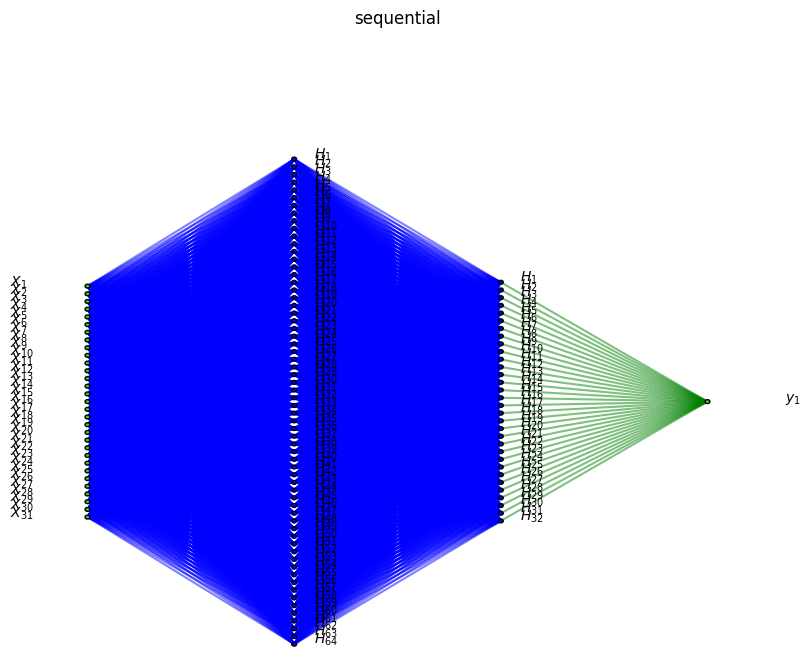

In [ ]:
# Visualize the Neural Network
visualize_nn(model)

In [ ]:
# Compilation of the first model using adam optimizer
model.compile(loss='mse', optimizer='adam', metrics=['precision', 'accuracy', 'recall'])

In [ ]:
# Verfication if the model is correctly implemented
model

<Sequential name=sequential, built=True>

In [ ]:
# @title Trying a validation split to see if there are any improvements of the model
'''# Training the model
history = model.fit(X_train_processed, y_train_encoded,
          validation_data=(X_test_processed, y_test_encoded),
          epochs=100, batch_size=32, validation_split=0.2)'''

'# Training the model\nhistory = model.fit(X_train_processed, y_train_encoded,\n          validation_data=(X_test_processed, y_test_encoded),\n          epochs=100, batch_size=32, validation_split=0.2)'

In [ ]:
# Fit your model using the transformed data (training the model)
history = model.fit(X_train_processed, y_train_encoded,
          validation_data=(X_test_processed, y_test_encoded),
          epochs=100)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.1211 - loss: 9.3557 - precision: 0.8239 - recall: 0.5962 - val_accuracy: 0.1456 - val_loss: 3.3464 - val_precision: 0.8582 - val_recall: 1.0000
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1339 - loss: 3.2979 - precision: 0.8790 - recall: 1.0000 - val_accuracy: 0.1456 - val_loss: 2.7673 - val_precision: 0.8582 - val_recall: 1.0000
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1285 - loss: 2.8521 - precision: 0.8741 - recall: 1.0000 - val_accuracy: 0.1456 - val_loss: 2.5306 - val_precision: 0.8582 - val_recall: 1.0000
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1303 - loss: 2.6039 - precision: 0.8794 - recall: 0.9974 - val_accuracy: 0.1571 - val_loss: 2.3078 - val_precision: 0.8696 - val_recall: 0.9978
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.1269 - loss: 2.3294 - precision: 0.8949 - recall: 0.9872 - val_accuracy: 0.2069 - val_loss: 2.101

In [ ]:
# @title Functions to see how your model improves over time

def plot_history(history, figsize=(12,10), marker='o'):

    # Get list of metrics from history
    metrics = [c for c in history.history if not c.startswith('val_')]

    ## Separate row for each metric
    fig, axes = plt.subplots(nrows=len(metrics),figsize=figsize)

    # For each metric
    for i, metric_name in enumerate(metrics):

        # Get the axis for the current metric
        ax = axes[i]

        # Get metric from history.history
        metric_values = history.history[metric_name]
        # Get epochs from history
        epochs = history.epoch

        # Plot the training metric
        ax.plot(epochs, metric_values, label=metric_name, marker=marker)

        ## Check if val_{metric} exists. if so, plot:
        val_metric_name = f"val_{metric_name}"
        if val_metric_name in history.history:
            # Get validation values and plot
            metric_values = history.history[val_metric_name]
            ax.plot(epochs,metric_values,label=val_metric_name, marker=marker)

        # Final subplot adjustments
        ax.legend()
        ax.set_title(metric_name)
    fig.tight_layout()

    return fig, axes

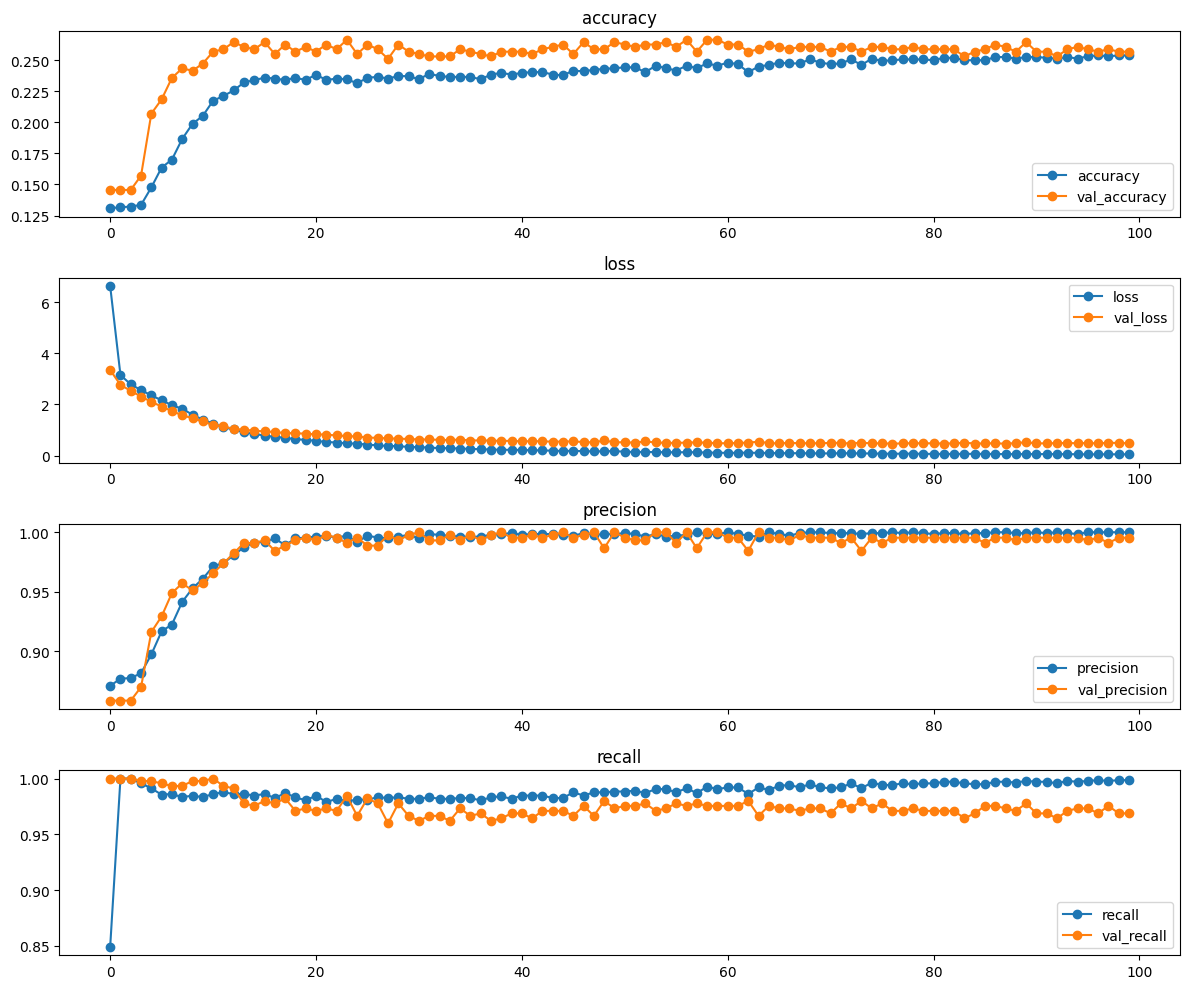

In [ ]:
# Call the custom function
plot_history(history);

In [ ]:
# Evaluate neural network on test data with builtin evaluation
result = model.evaluate(X_test_processed, y_test_encoded,return_dict=True)
print("Test metrics :")
result

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2610 - loss: 0.4856 - precision: 0.9951 - recall: 0.9630 
Test metrics :


{'accuracy': 0.25670498609542847,
 'loss': 0.4805198609828949,
 'precision': 0.9954128265380859,
 'recall': 0.96875}

In [ ]:
# Evaluate neural network on training data with builtin evaluation
train_result = model.evaluate(X_train_processed, y_train_encoded, return_dict=True)
print("Training metrics :")
train_result

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2739 - loss: 0.0396 - precision: 1.0000 - recall: 0.9988
Training metrics :


{'accuracy': 0.2543131113052368,
 'loss': 0.036705970764160156,
 'precision': 1.0,
 'recall': 0.9992711544036865}

It's good that the loss values becomes very low. However, after approximatively 12 epochs, the validation loss becomes higher than the training loss meaning we a overfitting case. We can say the same for the accuracy metric, the accuracy is greater for validation part than on training set, also reinforcing the overfitting.

Higher loss means that the model is struggling to make accurate predictions,here, on the validation part. Whereas, the training loss becoming very low is subject that our model is smooth at predicting on the training part. Our, the model's predictions are much less accurate on the unseen test data compared to the training data.
Thus, a lower loss value indicates that the model's predictions are closer to the actual values.

On the other hand, can see in our case for the accuracy of validation part is higher than test part contradicting the loss part, this might probably comes from the fact that accuracy is already very low(`≈0.25`) because the model didn't learn well to do correct predictions. The accuracy is given by:

`Accuracy = (True Positives + True Negatives) / (Total Predictions)`

We may have a very low accuracy due to the fact we are on a multi-class problem with 7 different obesity levels. So, it's much harder to get high accuracy in multi-class scenarios compared to binary classification, that is to say, a problem with only two classes. That's why even if a model is good at distinguishing some of the classes, it might be confused about others, leading to a lot of misclassifications, and therefore low overall accuracy like in our case.

Furthermore, the precision and recall are very high on both training and test set with the presence of a slight weakness on test side implying a light overfitting like said before.

The precision measure how many of the positive predictions were actually correct:

`precision = true positives / (true positives + false positives)`

In our case, the model's precision is :

* Test : `0.9954233169555664` = `99.54%`
* Training :  `1.0` = `100%`

This mean, overall the model precision is high on both sets, even 100 % on the training set. ▶ very small portion of false positives and high portion of true positives

▶ On the training there are no false positives. It indicates that during training, all the model positive predictions were actually correct meaning that someone has a certain obesity level.


**But!**

Precision doesn't tell us everything. A high precision model might miss many true actual positive cases (low recall). That's why we need to look at precision and recall together to understand if the model is doing good in predictions.

The recall metric, measures how many real positives cases the model successfully identified.

Recall :
`recall = true positives / (true positives + false negatives)`

In our case the recall are :

* Test : `0.9709821343421936` = `97.09%`
* Training :  `0.9970845580101013` = `99.71%`.

This means our model is predicting almost all positives cases, but this might lead to many false positives due to the high recall. Indeed, because, to get a high recall, the number of falses negatives has to be minimized. ▶ very small portion of false negatives but high portion of false positives.

Nonetheless, we have to compare the precision and the recall to give a conclusion. By comparing the recall with the precision :

Since we get a high precicion it implies that, the number of false positives obesity level predictions are very small.

But is there any link with the accuracy ?

I think, like said before, in a multi-class problem with several different classes might be origin of accuracy that can be misleading.

Indeed, the presence of 7 obesity classes might confuse the model ans thus, the reason of our model low accuracy :

* Test : `0.2656`= `26.56 %`
* Training : `0.2741` = `27.41 %`

The low accuracy might mean the model is confusing many of the differents obesity's classes, even if, when it predicts a particular obesity class, it's often right ➡ high precision.
And when there is one case of the class, it often detects it ➡ high recall. (Example : where a person actually belongs to a specific obesity level like Obesity_Type_II and the model predicts Obesity_Type_II ➡ This is a True Postive TP)


**Conclusion**

The training metrics are performing a little better than the testing ones implying a relatively small overfitting for our model.

At the same time, the model is subject of good performance with a specific class but poor amonng/between the differents classes of obesity. That's why the low accuracy on both sets, the accuracy is a measure of the entire model predictions performance. The low accuracy of the model, means it is often wrong in terms of predictions, but high precision means it is not generating false positive, and high recall means that it's finding most of the true positives, so we can say it is still a somehow good model.


We need to play with what we have :

* the number of neurons
* the number of layers
* activations functions

to try to get a better model for the predictions and better evaluations metrics.






In [ ]:
# Let's make the predictions and evaluate our 1st model

# Predictions
y_pred_test = model.predict(X_test_processed) # Predict on processed data
y_pred_train = model.predict(X_train_processed) # Predict on processed data

# Let's make the predictions and evaluate our 1st model

train_mse = mean_squared_error(y_train_encoded, y_pred_train)
test_mse = mean_squared_error(y_test_encoded, y_pred_test)

train_mae = mean_absolute_error(y_train_encoded, y_pred_train)
test_mae = mean_absolute_error(y_test_encoded, y_pred_test)

train_r2 = r2_score(y_train_encoded, y_pred_train)
test_r2 = r2_score(y_test_encoded, y_pred_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
results_df = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "MAE", "R2"],
    "Train": [train_mse, np.sqrt(train_mse), train_mae, train_r2],
    "Test": [test_mse, np.sqrt(test_mse), test_mae, test_r2]
})

print(results_df.to_string(formatters={'Train': '{:.4f}'.format, 'Test': '{:.4f}'.format}))

  Metric  Train   Test
0    MSE 0.0367 0.4805
1   RMSE 0.1916 0.6932
2    MAE 0.1347 0.3988
3     R2 0.9904 0.8694


By looking at these evaluation metrics values, we can see that the $R^2$ (`0.8350` on test and `0.9886` on train set) score metric is pretty high and close to `1` meaning that the model is still doing correct predictions among the differents classes of obesity. Whereas, RMSE and MSE seems to be high too but it support the fact of high loss.

### **2. Model of Neural Network II**
#### **➡ Addition of a hidden layer of 16 neurons.**



In [ ]:
# Instantiating and defining our Keras sequential model
model2 = Sequential()

# Add first hidden layer with 64 neurons. (Remark : it's not the imput layer)
# Tell Keras how to construct the input layer shape using input_dim
model2.add(Dense(64, input_dim = X_train_processed.shape[1], activation='relu')) # Use X_train_processed.shape[1] to specify the input dimension for the first layer.

# Add 2nd hidden layer with 32 neurons.
model2.add(Dense(32, activation='relu'))  # Remove input_dim from subsequent layers to allow them to infer their input shape

# Add 3rd hidden layer with 16 neurons.
model2.add(Dense(16, activation='relu'))

# Add output layer with 1 node
model2.add(Dense(1))

# Check summary of network
model2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

We have defined the hidden layers as :

* **The first hidden layer :**
  * `64` neurons
  * ReLu activation function

* **The second hidden layer :**
  * `32` neurons
  * ReLu activation function

* **The third hidden layer :**
  * `16` neurons
  * ReLu activation function

* **The output layer :**
  * `1` neuron(node)

  For the time being, we test only with ReLu activation function.
  
  /!\ Using ReLu will implies a lot of loss due to dying neurons /!\


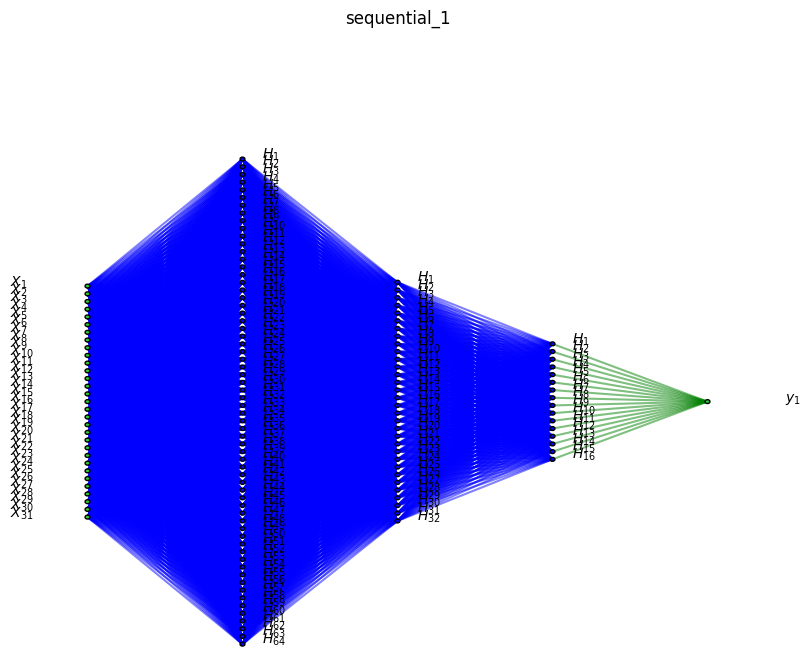

In [ ]:
# Visualize the Neural Network
visualize_nn(model2)

In [ ]:
# Compilation of the first model using adam optimizer
model2.compile(loss='mse', optimizer='adam', metrics=['precision', 'accuracy', 'recall'])

In [ ]:
# Verfication if the model is correctly implemented
model2

<Sequential name=sequential_1, built=True>

In [ ]:
# Fit the model using the transformed data (training the model)
history = model2.fit(X_train_processed, y_train_encoded,
          validation_data=(X_test_processed, y_test_encoded),
          epochs=100)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.1393 - loss: 7.7957 - precision: 0.7981 - recall: 0.6149 - val_accuracy: 0.1456 - val_loss: 3.2069 - val_precision: 0.8582 - val_recall: 1.0000
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1471 - loss: 3.1459 - precision: 0.8720 - recall: 1.0000 - val_accuracy: 0.1456 - val_loss: 2.6944 - val_precision: 0.8582 - val_recall: 1.0000
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1303 - loss: 2.5750 - precision: 0.8828 - recall: 0.9997 - val_accuracy: 0.1533 - val_loss: 2.4503 - val_precision: 0.8649 - val_recall: 1.0000
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1414 - loss: 2.3511 - precision: 0.8880 - recall: 0.9946 - val_accuracy: 0.1973 - val_loss: 2.0161 - val_precision: 0.9084 - val_recall: 0.9955
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1689 - loss: 1.9780 - precision: 0.9231 - recall: 0.9888 - val_accuracy: 0.2203 - val_loss: 1.7793

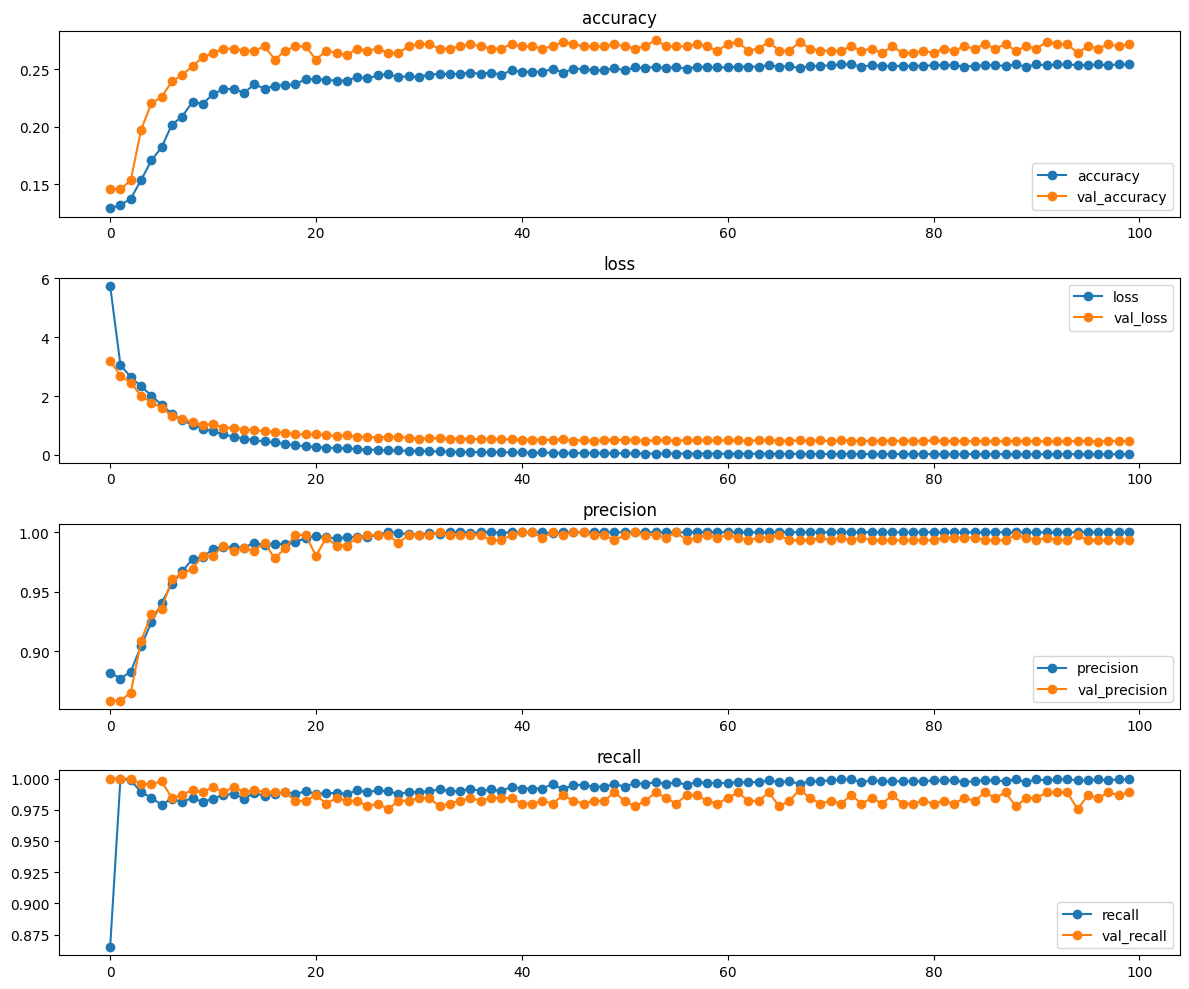

In [ ]:
# Call the custom function
plot_history(history);

Like before on the metrics :
recall, precision, accuracy must be the highest possible(near equal to 1, aware of noises !) whereas loss the smallest as possible.

In [ ]:
# Evaluate neural network on test data with builtin evaluation
test_result = model2.evaluate(X_test_processed, y_test_encoded,return_dict=True)
test_result

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2791 - loss: 0.4949 - precision: 0.9902 - recall: 0.9891 


{'accuracy': 0.27203065156936646,
 'loss': 0.47014373540878296,
 'precision': 0.9932735562324524,
 'recall': 0.9888392686843872}

In [ ]:
# Evaluate neural network on training data with builtin evaluation
train_result = model2.evaluate(X_train_processed, y_train_encoded, return_dict=True)
train_result

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2749 - loss: 0.0176 - precision: 1.0000 - recall: 1.0000


{'accuracy': 0.254952073097229,
 'loss': 0.016526425257325172,
 'precision': 1.0,
 'recall': 1.0}

As the first model, we get a accuracy of `0.27203065156936646 = 27.72%` which is very low showing that our model performs not well on classifying the diffrents obesity classes. Also for loss that is quite considerable. However, in spite of this, the model is strong for true positives (high recall and precision). We therefore need to find a better model that is to say with higher accuracy and lower loss.

As the first the model there are no much changes... same reasoning there. Adding a layer of `16` neurons didn't bring much improvements to our model.

Still, we can consider that one small step of improvement as already a giant leap for our model performance predictions :

**First Model test metrics :**
* **accuracy:** `0.2586206793785095 = 25.86%`
* **loss:** `0.41994497179985046 = 41.99%`
* **precision:** `0.9931662678718567 = 99.31%`
* **recall:** `0.9732142686843872 = 97.32%`

Comparing with the second model :

**Second Model test metrics :**

* **accuracy:** `0.27203065156936646 = 27.20%`
* **loss:** `0.34906235337257385 = 34.90%`
* **precision:** `0.9910714030265808 = 99.11%`
* **recall:** `0.9910714030265808 = 99.11%`

We can see that the 2nd model has a overall better performance with just a negligible tiny drop of precision.

Otherwise, we can notice that a stunning occurence of precision = recall => falses positives = falses negatives.
This would make the F1-Score maximized because precision = recall = F1-Score.

**Conclusion**

We need to play more with the layers, neurons and activations functions to try finding a better model in particular with lower loss and higher accuracy for the obesity classes.

In [ ]:
# Let's make the predictions and evaluate our 2nd model

# Predictions
y_pred_test = model2.predict(X_test_processed) # Predict on processed data
y_pred_train = model2.predict(X_train_processed) # Predict on processed data

# Let's make the predictions and evaluate our 1st model

train_mse = mean_squared_error(y_train_encoded, y_pred_train)
test_mse = mean_squared_error(y_test_encoded, y_pred_test)

train_mae = mean_absolute_error(y_train_encoded, y_pred_train)
test_mae = mean_absolute_error(y_test_encoded, y_pred_test)

train_r2 = r2_score(y_train_encoded, y_pred_train)
test_r2 = r2_score(y_test_encoded, y_pred_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
results_df = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "MAE", "R2"],
    "Train": [train_mse, np.sqrt(train_mse), train_mae, train_r2],
    "Test": [test_mse, np.sqrt(test_mse), test_mae, test_r2]
})

print(results_df.to_string(formatters={'Train': '{:.4f}'.format, 'Test': '{:.4f}'.format}))

  Metric  Train   Test
0    MSE 0.0165 0.4701
1   RMSE 0.1286 0.6857
2    MAE 0.0939 0.3472
3     R2 0.9957 0.8722


  Metric  Train   Test
0    MSE 0.0124 0.4772
1   RMSE 0.1112 0.6908
2    MAE 0.0820 0.3783
3     R2 0.9968 0.8703

Same as for the model I, our models still need a lot of improvements like disscussed before.

### **3. Model of Neural Network III**
#### **➡ Same number of layers as the second model but with less neurons.**

In [ ]:
# Instantiating and defining our Keras sequential model
model3 = Sequential()

# Add first hidden layer with 32 neurons. (Remark : it's not the imput layer)
# Tell Keras how to construct the input layer shape using input_dim
model3.add(Dense(32, input_dim = X_train_processed.shape[1], activation='relu')) # Use X_train_processed.shape[1] to specify the input dimension for the first layer.

# Add 2nd hidden layer with 32 neurons.
model3.add(Dense(16, activation='relu'))  # Remove input_dim from subsequent layers to allow them to infer their input shape

# Add 3rd hidden layer with 8 neurons.
model3.add(Dense(8, activation='relu'))

# Add output layer with 1 node
model3.add(Dense(1))

# Check summary of network
model3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 32)                  │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,697 (6.63 KB)

 Trainable params: 1,697 (6.63 KB)

 Non-trainable params: 0 (0.00 B)

We have defined the third sequential model of Keras deep learning framework taking as imput the X_train_processed's dimension for the first layer. Furthermore, we have defined the hidden layers as :

* **The first hidden layer :**
  * `32` neurons
  * ReLu activation function

* **The second hidden layer :**
  * `16` neurons
  * tanh activation function

  * **The third hidden layer :**
  * `8` neurons
  * ReLu activation function

* **The output layer :**
  * `1` neuron(node)
  * sigmoid activation function

  We have chosen those activation functions because we are in a multi-class classification, that's why, the hidden layers are defined with ReLu activation functions.

In [ ]:
# Compilation of the first model using adam optimizer
model3.compile(loss='mse', optimizer='adam', metrics=['precision', 'accuracy', 'recall'])

In [ ]:
# Verfication if the model is correctly implemented
model3

<Sequential name=sequential_2, built=True>

In [ ]:
# Fit the model using the transformed data (training the model)
history = model3.fit(X_train_processed, y_train_encoded,
          validation_data=(X_test_processed, y_test_encoded),
          epochs=100)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1260 - loss: 12.4222 - precision: 0.5965 - recall: 0.0893 - val_accuracy: 0.1456 - val_loss: 6.3084 - val_precision: 0.8582 - val_recall: 1.0000
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1377 - loss: 5.1705 - precision: 0.8745 - recall: 1.0000 - val_accuracy: 0.1456 - val_loss: 3.1081 - val_precision: 0.8582 - val_recall: 1.0000
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1189 - loss: 3.0895 - precision: 0.8761 - recall: 1.0000 - val_accuracy: 0.1456 - val_loss: 2.6107 - val_precision: 0.8582 - val_recall: 1.0000
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1302 - loss: 2.7501 - precision: 0.8708 - recall: 0.9999 - val_accuracy: 0.1475 - val_loss: 2.4081 - val_precision: 0.8599 - val_recall: 1.0000
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1286 - loss: 2.4950 - precision: 0.8700 - recall: 0.9987 - val_accuracy: 0.1552 - val_loss: 2.29

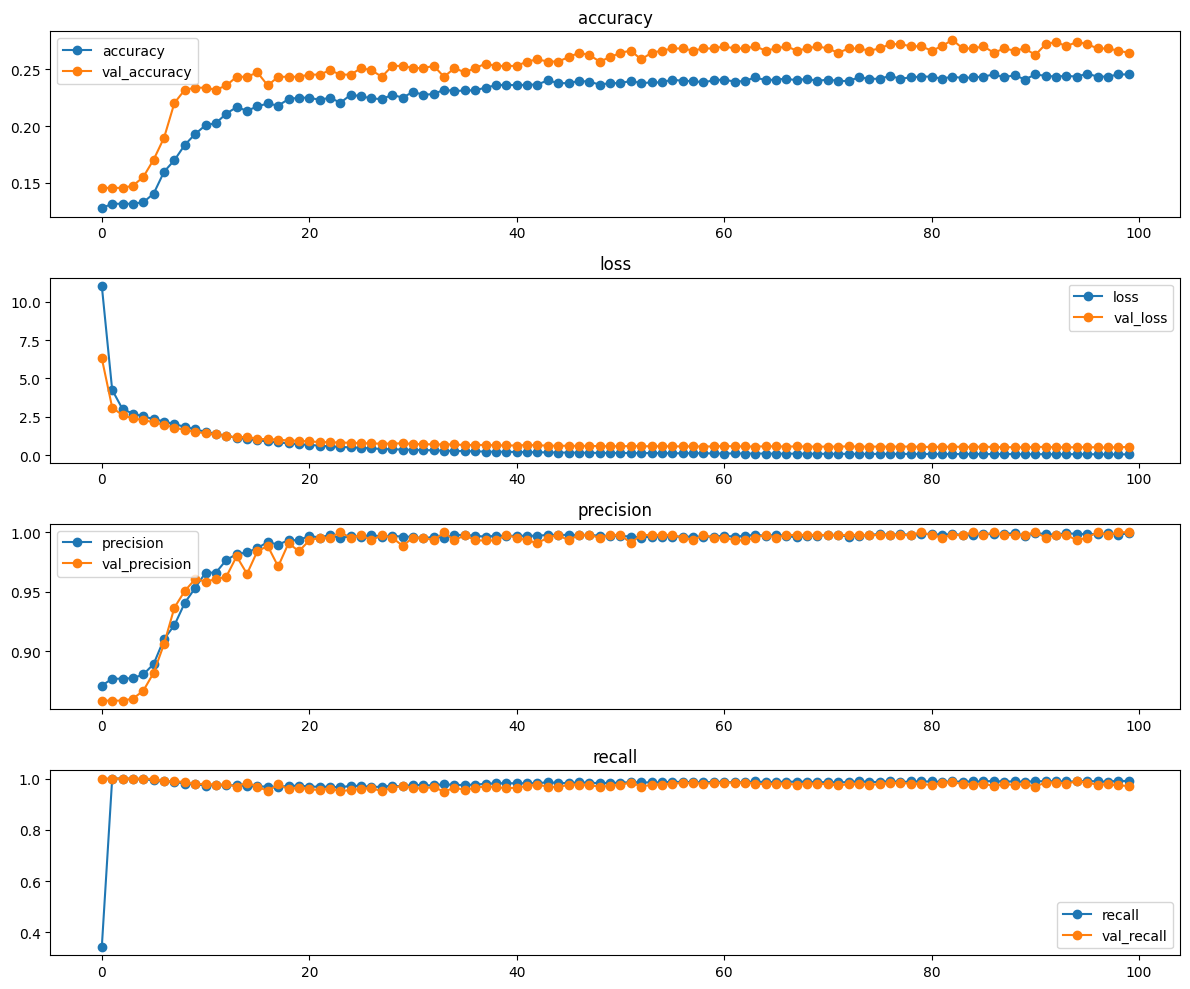

In [ ]:
# Call the custom function
plot_history(history);

In [ ]:
# Evaluate neural network on training data with builtin evaluation
train_result = model3.evaluate(X_train_processed, y_train_encoded, return_dict=True)
train_result

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2646 - loss: 0.0743 - precision: 1.0000 - recall: 0.9882


{'accuracy': 0.24217252433300018,
 'loss': 0.06799905002117157,
 'precision': 1.0,
 'recall': 0.9854227304458618}

In [ ]:
# Evaluate neural network on test data with builtin evaluation
test_result = model3.evaluate(X_test_processed, y_test_encoded,return_dict=True)
test_result

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2715 - loss: 0.5552 - precision: 1.0000 - recall: 0.9677 


{'accuracy': 0.26436781883239746,
 'loss': 0.5416406989097595,
 'precision': 1.0,
 'recall': 0.9709821343421936}

We have been able to reduce the loss and somewhat improved the accuracy but is still very low. => still not a good model.


**Second Model test metrics :**

* **accuracy:** `0.27203065156936646 = 27.20%`
* **loss:** `0.34906235337257385 = 34.90%`
* **precision:** `0.9910714030265808 = 99.11%`
* **recall:** `0.9910714030265808 = 99.11%`

**Comparing with the third model test metrics :**

* **accuracy:** `0.27586206793785095 = 27.58%`
* **loss:** `0.28113603591918945 = 28.11%`
* **precision:** `0.9955157041549683 = 99.55%`
* **recall:** `0.9910714030265808 = 99.11%`

In [ ]:
# Let's make the predictions and evaluate our third model

# Predictions
y_pred_test = model3.predict(X_test_processed) # Predict on processed data
y_pred_train = model3.predict(X_train_processed) # Predict on processed data

# Let's make the predictions and evaluate our third model

train_mse = mean_squared_error(y_train_encoded, y_pred_train)
test_mse = mean_squared_error(y_test_encoded, y_pred_test)

train_mae = mean_absolute_error(y_train_encoded, y_pred_train)
test_mae = mean_absolute_error(y_test_encoded, y_pred_test)

train_r2 = r2_score(y_train_encoded, y_pred_train)
test_r2 = r2_score(y_test_encoded, y_pred_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
results_df = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "MAE", "R2"],
    "Train": [train_mse, np.sqrt(train_mse), train_mae, train_r2],
    "Test": [test_mse, np.sqrt(test_mse), test_mae, test_r2]
})

print(results_df.to_string(formatters={'Train': '{:.4f}'.format, 'Test': '{:.4f}'.format}))

  Metric  Train   Test
0    MSE 0.0680 0.5416
1   RMSE 0.2608 0.7360
2    MAE 0.1864 0.4033
3     R2 0.9822 0.8527


We will compare those metrics once we get a better models according to the precision, accuracy, F1-score and loss metrics.

### **4. Model of Neural Network IV**

#### **➡ Trying to change activations functions, number of layers, number of neurons and other parameters like the loss function.**

### **➡ Trying to get the best model we can !**

🍾**For the fourth model, I kept some of the models I tried but commented them. Keeping them all would overload the notebook.**🍾

We will choose the Neural Network model that gives a better prediction performance than the third Neural Network model and then compare it with the winner classic machine learning model.

In [ ]:
# @title Model with one layer of activation function tanh
''' # Instantiating and defining our Keras sequential model
model4 = Sequential()

# Add first hidden layer with 27 neurons. (Remark : it's not the imput layer)
# Tell Keras how to construct the input layer shape using input_dim

model4.add(Dense(27, input_dim = X_train_processed.shape[1], activation='relu')) # Use X_train_processed.shape[1] to specify the input dimension for the first layer.

# Add 2nd hidden layer with 22 neurons.
model4.add(Dense(22, activation='relu'))  # Remove input_dim from subsequent layers to allow them to infer their input shape

# Add 3rd hidden layer with 16 neurons.
model4.add(Dense(16, activation='relu'))

# Add 4th hidden layer with 12 neurons.
model4.add(Dense(12, activation='relu'))

# Add 5th hidden layer with 8 neurons.
model4.add(Dense(8, activation='tanh'))

# Add 6th hidden layer with 4 neurons.
model4.add(Dense(4, activation='relu'))

# Add output layer with 1 node
model4.add(Dense(1))

# Check summary of network
model4.summary()'''

" # Instantiating and defining our Keras sequential model\nmodel4 = Sequential()\n\n# Add first hidden layer with 27 neurons. (Remark : it's not the imput layer)\n# Tell Keras how to construct the input layer shape using input_dim\n\nmodel4.add(Dense(27, input_dim = X_train_processed.shape[1], activation='relu')) # Use X_train_processed.shape[1] to specify the input dimension for the first layer.\n\n# Add 2nd hidden layer with 22 neurons.\nmodel4.add(Dense(22, activation='relu'))  # Remove input_dim from subsequent layers to allow them to infer their input shape\n\n# Add 3rd hidden layer with 16 neurons.\nmodel4.add(Dense(16, activation='relu'))\n\n# Add 4th hidden layer with 12 neurons.\nmodel4.add(Dense(12, activation='relu'))\n\n# Add 5th hidden layer with 8 neurons.\nmodel4.add(Dense(8, activation='tanh'))\n\n# Add 6th hidden layer with 4 neurons.\nmodel4.add(Dense(4, activation='relu'))\n\n# Add output layer with 1 node\nmodel4.add(Dense(1))\n\n# Check summary of network\nmodel4.s

We have defined the fourth sequential model of Keras deep learning framework taking as imput the X_train_processed's dimension for the first layer. Furthermore, we have defined the hidden layers as :

* **The first hidden layer :**
  * `27` neurons
  * ReLu activation function

* **The second hidden layer :**
  * `22` neurons
  *  ReLu activation function

* **The third hidden layer :**
  * `16` neurons
  * ReLu activation function

* **The fourth hidden layer :**
  * `12` neurons
  *  ReLu activation function

* **The fifth hidden layer :**
  * `8` neurons
  * tanh activation function

  * **The fourth hidden layer :**
  * `4` neurons
  *  ReLu activation function

* **The output layer :**
  * `1` neuron(node)
  * no activation function

  We have chosen those activation functions because we are in a multi-class classification, that's why, the hidden layers are defined with ReLu and tanh activation functions.


For this model :


With loss, accuracy, recall and F1-score model's evaluation metrics :

**Testing set :**

* **accuracy:** `0.26819923520088196 = 26.81%`
* **loss:** `0.2419312298297882 = 24.19%`
* **precision:** `0.9866666793823242 = 99.86%`
* **recall:** `0.9910714030265808 = 99.10%`

**Training set :**

* **accuracy:** `0.2523961663246155 = 25.23%`
* **loss:** `0.053500231355428696 = 5.35%`
* **precision:** `1.0 = 100%`
* **recall:** `0.9970845580101013 = 99.71%`


With MSE, RMSE, MAE and $R^2$ model's evaluation metrics :

**Testing set :**


* MSE : `0.4418`
* RMSE : `0.6647`
* MAE : `0.2419`
* $R^2$ : `0.8799`

**Training set :**
* MSE : `0.0111`
* RMSE : `0.1054`
* MAE : `0.0535`
* $R^2$ : `0.9971`


In [ ]:
# @title Model with layers alternation between tanh and ReLu activations functions
''' # Instantiating and defining our Keras sequential model
model4 = Sequential()

# Add first hidden layer with 64 neurons. (Remark : it's not the imput layer)
# Tell Keras how to construct the input layer shape using input_dim

model4.add(Dense(64, input_dim = X_train_processed.shape[1], activation='relu')) # Use X_train_processed.shape[1] to specify the input dimension for the first layer.

# Add 2nd hidden layer with 32 neurons.
model4.add(Dense(32, activation='tanh'))  # Remove input_dim from subsequent layers to allow them to infer their input shape

# Add 3rd hidden layer with 16 neurons.
model4.add(Dense(16, activation='relu'))

# Add 4th hidden layer with 8 neurons.
model4.add(Dense(8, activation='tanh'))

# Add output layer with 1 node
model4.add(Dense(1))

# Check summary of network
model4.summary()'''

" # Instantiating and defining our Keras sequential model\nmodel4 = Sequential()\n\n# Add first hidden layer with 64 neurons. (Remark : it's not the imput layer)\n# Tell Keras how to construct the input layer shape using input_dim\n\nmodel4.add(Dense(64, input_dim = X_train_processed.shape[1], activation='relu')) # Use X_train_processed.shape[1] to specify the input dimension for the first layer.\n\n# Add 2nd hidden layer with 32 neurons.\nmodel4.add(Dense(32, activation='tanh'))  # Remove input_dim from subsequent layers to allow them to infer their input shape\n\n# Add 3rd hidden layer with 16 neurons.\nmodel4.add(Dense(16, activation='relu'))\n\n# Add 4th hidden layer with 8 neurons.\nmodel4.add(Dense(8, activation='tanh'))\n\n# Add output layer with 1 node\nmodel4.add(Dense(1))\n\n# Check summary of network\nmodel4.summary()"

We have defined the fourth sequential model of Keras deep learning framework taking as imput the X_train_processed's dimension for the first layer. Furthermore, we have defined the hidden layers as :

* **The first hidden layer :**
  * `64` neurons
  * ReLu activation function

* **The second hidden layer :**
  * `32` neurons
  * tanh activation function

  * **The third hidden layer :**
  * `16` neurons
  * ReLu activation function

  * **The fourth hidden layer :**
  * `8` neurons
  * tanh activation function

* **The output layer :**
  * `1` neuron(node)
  * no activation function

  We have chosen those activation functions because we are in a multi-class classification, that's why, the hidden layers are defined with ReLu and tanh activation functions.

**Results :**


**Third Model test metrics :**

* **accuracy:** `0.27586206793785095 = 27.58%`
* **loss:** `0.28113603591918945 = 28.11%`
* **precision:** `0.9955157041549683 = 99.55%`
* **recall:** `0.9910714030265808 = 99.11%`

**Comparing with the fourth model test metrics :**

* **accuracy:** `0.27586206793785095 = 27.58%`
* **loss:** `0.2351938635110855 = 23.51%`
* **precision:** `1.0 = 100%`
* **recall:** `0.9866071343421936 = 98.66%`

We are getting the same accuracy, but loss decreases of approximatively 5 % that's a good sign for the model even if it's small. It means this model does better a better job in classifying the differents obesity classes than the third one. However, the perfect precision might introduce a overfitting and learning the noises or it's due to data leakage.

In [ ]:
# @title Model with two hidden layers having tanh activation and the rest with ReLu.
'''# Instantiating and defining our Keras sequential model
model4 = Sequential()

# Add first hidden layer with 27 neurons. (Remark : it's not the imput layer)
# Tell Keras how to construct the input layer shape using input_dim

model4.add(Dense(27, input_dim = X_train_processed.shape[1], activation='relu')) # Use X_train_processed.shape[1] to specify the input dimension for the first layer.

# Add 2nd hidden layer with 22 neurons.
model4.add(Dense(22, activation='relu'))  # Remove input_dim from subsequent layers to allow them to infer their input shape

# Add 3rd hidden layer with 16 neurons.
model4.add(Dense(16, activation='relu'))

# Add 4th hidden layer with 12 neurons.
model4.add(Dense(12, activation='tanh'))

# Add 5th hidden layer with 8 neurons.
model4.add(Dense(8, activation='tanh'))

# Add 6th hidden layer with 4 neurons.
model4.add(Dense(4, activation='relu'))

# Add output layer with 1 node
model4.add(Dense(1))

# Check summary of network
model4.summary()'''

"# Instantiating and defining our Keras sequential model\nmodel4 = Sequential()\n\n# Add first hidden layer with 27 neurons. (Remark : it's not the imput layer)\n# Tell Keras how to construct the input layer shape using input_dim\n\nmodel4.add(Dense(27, input_dim = X_train_processed.shape[1], activation='relu')) # Use X_train_processed.shape[1] to specify the input dimension for the first layer.\n\n# Add 2nd hidden layer with 22 neurons.\nmodel4.add(Dense(22, activation='relu'))  # Remove input_dim from subsequent layers to allow them to infer their input shape\n\n# Add 3rd hidden layer with 16 neurons.\nmodel4.add(Dense(16, activation='relu'))\n\n# Add 4th hidden layer with 12 neurons.\nmodel4.add(Dense(12, activation='tanh'))\n\n# Add 5th hidden layer with 8 neurons.\nmodel4.add(Dense(8, activation='tanh'))\n\n# Add 6th hidden layer with 4 neurons.\nmodel4.add(Dense(4, activation='relu'))\n\n# Add output layer with 1 node\nmodel4.add(Dense(1))\n\n# Check summary of network\nmodel4.su

We have defined the fourth sequential model of Keras deep learning framework taking as imput the X_train_processed's dimension for the first layer. Furthermore, we have defined the hidden layers as :

* **The first hidden layer :**
  * `27` neurons
  * ReLu activation function

* **The second hidden layer :**
  * `22` neurons
  *  ReLu activation function

* **The third hidden layer :**
  * `16` neurons
  * ReLu activation function

* **The fourth hidden layer :**
  * `12` neurons
  *  tanh activation function

* **The fifth hidden layer :**
  * `8` neurons
  * tanh activation function

  * **The fourth hidden layer :**
  * `4` neurons
  *  ReLu activation function

* **The output layer :**
  * `1` neuron(node)
  * no activation function

  We have chosen those activation functions because we are in a multi-class classification, that's why, the hidden layers are defined with ReLu and tanh activation functions.


For this model :

**Testing set :**


* **accuracy:** `0.26819923520088196 = 26.81%`
* **loss:** `0.20586751401424408 = 20.58%`
* **precision:** `0.9954751133918762 = 99.55%`
* **recall:** `0.9821428656578064 = 98.21%`


**Training set :**

* **accuracy:** `0.2523961663246155 = 26.81%`
* **loss:** `0.04363471642136574 = 4.36%`
* **precision:** `1.0 = 100%`
* **recall:** `0.9970845580101013 = 99.71%`

In [ ]:
# @title Model with two hidden layers having tanh activation and the rest with ReLu.
'''# Instantiating and defining our Keras sequential model
model4 = Sequential()

# Add first hidden layer with 27 neurons. (Remark : it's not the imput layer)
# Tell Keras how to construct the input layer shape using input_dim

model4.add(Dense(27, input_dim = X_train_processed.shape[1], activation='relu')) # Use X_train_processed.shape[1] to specify the input dimension for the first layer.

# Add 2nd hidden layer with 22 neurons.
model4.add(Dense(22, activation='relu'))  # Remove input_dim from subsequent layers to allow them to infer their input shape

# Add 3rd hidden layer with 16 neurons.
model4.add(Dense(16, activation='relu'))

# Add 4th hidden layer with 12 neurons.
model4.add(Dense(12, activation='relu'))

# Add 5th hidden layer with 8 neurons.
model4.add(Dense(8, activation='tanh'))

# Add 6th hidden layer with 4 neurons.
model4.add(Dense(4, activation='relu'))

# Add output layer with 1 node
model4.add(Dense(1))

# Check summary of network
model4.summary()'''

"# Instantiating and defining our Keras sequential model\nmodel4 = Sequential()\n\n# Add first hidden layer with 27 neurons. (Remark : it's not the imput layer)\n# Tell Keras how to construct the input layer shape using input_dim\n\nmodel4.add(Dense(27, input_dim = X_train_processed.shape[1], activation='relu')) # Use X_train_processed.shape[1] to specify the input dimension for the first layer.\n\n# Add 2nd hidden layer with 22 neurons.\nmodel4.add(Dense(22, activation='relu'))  # Remove input_dim from subsequent layers to allow them to infer their input shape\n\n# Add 3rd hidden layer with 16 neurons.\nmodel4.add(Dense(16, activation='relu'))\n\n# Add 4th hidden layer with 12 neurons.\nmodel4.add(Dense(12, activation='relu'))\n\n# Add 5th hidden layer with 8 neurons.\nmodel4.add(Dense(8, activation='tanh'))\n\n# Add 6th hidden layer with 4 neurons.\nmodel4.add(Dense(4, activation='relu'))\n\n# Add output layer with 1 node\nmodel4.add(Dense(1))\n\n# Check summary of network\nmodel4.su

We have defined the fourth sequential model of Keras deep learning framework taking as imput the X_train_processed's dimension for the first layer. Furthermore, we have defined the hidden layers as :

* **The first hidden layer :**
  * `27` neurons
  * ReLu activation function

* **The second hidden layer :**
  * `22` neurons
  *  ReLu activation function

* **The third hidden layer :**
  * `16` neurons
  * ReLu activation function

* **The fourth hidden layer :**
  * `12` neurons
  *  ReLu activation function

* **The fifth hidden layer :**
  * `8` neurons
  * tanh activation function

  * **The fourth hidden layer :**
  * `4` neurons
  *  ReLu activation function

* **The output layer :**
  * `1` neuron(node)
  * no activation function

  We have chosen those activation functions because we are in a multi-class classification, that's why, the hidden layers are defined with ReLu and tanh activation functions.


For this model :


With loss, accuracy, recall and F1-score model's evaluation metrics :

**Testing set :**

* **accuracy:** `0.26819923520088196 = 26.81%`
* **loss:** `0.2419312298297882 = 24.19%`
* **precision:** `0.9866666793823242 = 99.86%`
* **recall:** `0.9910714030265808 = 99.10%`

**Training set :**

* **accuracy:** `0.2523961663246155 = 25.23%`
* **loss:** `0.053500231355428696 = 5.35%`
* **precision:** `1.0 = 100%`
* **recall:** `0.9970845580101013 = 99.71%`


With MSE, RMSE, MAE and $R^2$ model's evaluation metrics :

**Testing set :**


* MSE : `0.4418`
* RMSE : `0.6647`
* MAE : `0.2419`
* $R^2$ : `0.8799`

**Training set :**
* MSE : `0.0111`
* RMSE : `0.1054`
* MAE : `0.0535`
* $R^2$ : `0.9971`


In [ ]:
# @title Model with first layer having tanh activation function and using Leaky ReLu instead of classical ReLu activation function.

'''# Instantiating and defining our Keras sequential model
model4 = Sequential()

# Add first hidden layer with 60 neurons and 'tanh' activation
model4.add(Dense(60, input_dim=X_train_processed.shape[1], activation='tanh'))

# Add 2nd hidden layer with 50 neurons, using LeakyReLU
model4.add(Dense(50, activation=None))  # No activation in Dense
model4.add(LeakyReLU(alpha=0.01))  # Add LeakyReLU separately

# Add 3rd hidden layer with 40 neurons, using LeakyReLU
model4.add(Dense(40, activation=None))
model4.add(LeakyReLU(alpha=0.01))

# Add 4th hidden layer with 30 neurons, using LeakyReLU
model4.add(Dense(30, activation=None))
model4.add(LeakyReLU(alpha=0.01))

# Add 5th hidden layer with 20 neurons, using LeakyReLU
model4.add(Dense(20, activation=None))
model4.add(LeakyReLU(alpha=0.01))

# Add 6th hidden layer with 10 neurons, using LeakyReLU
model4.add(Dense(10, activation=None))
model4.add(LeakyReLU(alpha=0.01))

# Add output layer with 1 node (default is linear activation)
model4.add(Dense(1))

# Check summary of network
model4.summary()
'''

"# Instantiating and defining our Keras sequential model\nmodel4 = Sequential()\n\n# Add first hidden layer with 60 neurons and 'tanh' activation\nmodel4.add(Dense(60, input_dim=X_train_processed.shape[1], activation='tanh'))\n\n# Add 2nd hidden layer with 50 neurons, using LeakyReLU\nmodel4.add(Dense(50, activation=None))  # No activation in Dense\nmodel4.add(LeakyReLU(alpha=0.01))  # Add LeakyReLU separately\n\n# Add 3rd hidden layer with 40 neurons, using LeakyReLU\nmodel4.add(Dense(40, activation=None))\nmodel4.add(LeakyReLU(alpha=0.01))\n\n# Add 4th hidden layer with 30 neurons, using LeakyReLU\nmodel4.add(Dense(30, activation=None))\nmodel4.add(LeakyReLU(alpha=0.01))\n\n# Add 5th hidden layer with 20 neurons, using LeakyReLU\nmodel4.add(Dense(20, activation=None))\nmodel4.add(LeakyReLU(alpha=0.01))\n\n# Add 6th hidden layer with 10 neurons, using LeakyReLU\nmodel4.add(Dense(10, activation=None))\nmodel4.add(LeakyReLU(alpha=0.01))\n\n# Add output layer with 1 node (default is line

We have defined the fourth sequential model of Keras deep learning framework taking as imput the X_train_processed's dimension for the first layer. Furthermore, we have defined the hidden layers as :

* **The first hidden layer :**
  * `60` neurons
  * tanh activation function

* **The second hidden layer :**
  * `50` neurons
  * Leaky ReLu activation function

* **The third hidden layer :**
  * `40` neurons
  * Leaky ReLu activation function

* **The fourth hidden layer :**
  * `30` neurons
  * Leaky ReLu activation function

* **The fifth hidden layer :**
  * `20` neurons
  * Leaky ReLu activation function

* **The fifth hidden layer :**
  * `20` neurons
  * Leaky ReLu activation function

* **The output layer :**
  * `1` neuron(node)
  * no activation function

  We have chosen those activation functions because we are in a multi-class classification, that's why, the hidden layers are defined with **Leaky ReLu to avoid the dying neurons** and tanh activation functions.

  **Performances results of our model :**

**With loss, accuracy, recall and F1-score model's evaluation metrics :**

**Testing set :**

* **accuracy:** `0.27586206793785095 = 27.58%`
* **loss:** `0.16507229208946228 = 16.51%`
* **precision:** `0.9977477192878723 = 99.77%`
* **recall:** `0.9888392686843872 = 98.88%`

**Training set :**

* **accuracy:** `0.25367411971092224 = 25.36%`
* **loss:** `0.060807447880506516 = 6.08%`
* **precision:** `1.0 = 100%`
* **recall:** `0.9985422492027283 = 99.85%`


**With MSE, RMSE, MAE and $R^2$ model's evaluation metrics :**

**Testing set :**

* MSE : `0.2044`
* RMSE : `0.4521`
* MAE : `0.1651`
* $R^2$ : `0.9444`

**Training set :**
* MSE : `0.0053`
* RMSE : `0.0885`
* MAE : `0.0608`
* $R^2$ : `0.9980`

Using Leaky ReLu instead of classical ReLu activation function should address the dying ReLU problem by introducing a small, non-zero gradient to prevents the neuron from becoming inactive and then "dying". However in our case it didn't confer any imporovements to our model.  Why ?

In fact, in our case, it means the dying neurons raising from ReLus activations functions shouldn't have been a major issues, there are no many dying neurons in our model.

In [ ]:
# @title Model with first layer having tanh activation function
# Instantiating and defining our Keras sequential model
model4 = Sequential()

# Add first hidden layer with 60 neurons. (Remark : it's not the imput layer)
# Tell Keras how to construct the input layer shape using input_dim
model4.add(Dense(60, input_dim = X_train_processed.shape[1], activation='tanh')) # Use X_train_processed.shape[1] to specify the input dimension for the first layer.

# Add 2nd hidden layer with 50 neurons.
model4.add(Dense(50, activation='relu'))

# Add 2nd hidden layer with 40 neurons.
model4.add(Dense(40, activation='relu'))

# Add 3rd hidden layer with 30 neurons.
model4.add(Dense(30, activation='relu'))

# Add 3rd hidden layer with 20 neurons.
model4.add(Dense(20, activation='relu'))

# Add 3rd hidden layer with 10 neurons.
model4.add(Dense(10, activation='relu'))

# Add output layer with 1 node
model4.add(Dense(1))

# Check summary of network
model4.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 60)                  │           1,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 50)                  │           3,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 40)                  │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 30)                  │           1,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,081 (35.47 KB)

 Trainable params: 9,081 (35.47 KB)

 Non-trainable params: 0 (0.00 B)

We have defined the fourth sequential model of Keras deep learning framework taking as imput the X_train_processed's dimension for the first layer. Furthermore, we have defined the hidden layers as :

* **The first hidden layer :**
  * `60` neurons
  * tanh activation function

* **The second hidden layer :**
  * `50` neurons
  * ReLu activation function

* **The third hidden layer :**
  * `40` neurons
  * ReLu activation function

* **The fourth hidden layer :**
  * `30` neurons
  * ReLu activation function

* **The fifth hidden layer :**
  * `20` neurons
  * ReLu activation function

* **The fifth hidden layer :**
  * `20` neurons
  * ReLu activation function

* **The output layer :**
  * `1` neuron(node)
  * no activation function

We have chosen those activation functions because we are in a multi-class classification, that's why, the hidden layers are defined with ReLu and tanh activation functions.


For this model :

With loss, accuracy, recall and F1-score model's evaluation metrics :

**Testing set :**

* **accuracy:** `0.27586206793785095 = 27.58%`
* **loss:** `0.15943609178066254 = 15.94%`
* **precision:** `1.0 = 100%`
* **recall:** `0.9866071343421936 = 98.66%`

**Training set :**

* **accuracy:** `0.25367411971092224 = 25.36%`
* **loss:** `0.0431600958108902 = 5.35%`
* **precision:** `1.0 = 100%`
* **recall:** `0.9985422492027283 = 99.71%`


With MSE, RMSE, MAE and $R^2$ model's evaluation metrics :

**Testing set :**

* MSE : `0.2450`
* RMSE : `0.4950`
* MAE : `0.1594`
* $R^2$ : `0.9334`

**Training set :**
* MSE : `0.0053`
* RMSE : `0.0728`
* MAE : `0.0432`
* $R^2$ : `0.9986`

After so many attempts, we have finally managed to increase once again, a little our model's accuracy(`27.58 %`) and we've managed to get the loss under the 20 percent(decent `15.94%`) making this model already a big "success" on the training set.


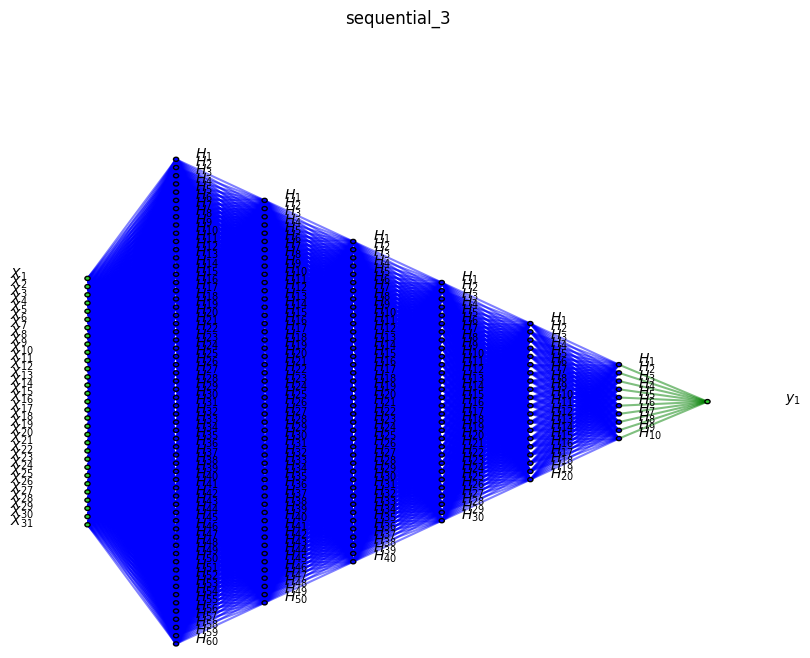

In [ ]:
# Visualize the Neural Network
visualize_nn(model4)

In [ ]:
# Compilation of the first model using adam optimizer
model4.compile(loss='mae', optimizer='adam', metrics=['precision', 'accuracy', 'recall'])

In [ ]:
# Verfication if the model is correctly implemented
model4

<Sequential name=sequential_3, built=True>

In [ ]:
# Fit the model using the transformed data (training the model)
history = model4.fit(X_train_processed, y_train_encoded,
          validation_data=(X_test_processed, y_test_encoded),
          epochs=100, batch_size=32)

Epoch 1/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.1282 - loss: 2.4208 - precision: 0.7508 - recall: 0.4892 - val_accuracy: 0.1456 - val_loss: 1.2191 - val_precision: 0.8582 - val_recall: 1.0000
Epoch 2/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1392 - loss: 1.2959 - precision: 0.8945 - recall: 0.9925 - val_accuracy: 0.2280 - val_loss: 1.0387 - val_precision: 0.9502 - val_recall: 0.9799
Epoch 3/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1886 - loss: 1.1595 - precision: 0.9594 - recall: 0.9763 - val_accuracy: 0.2395 - val_loss: 0.9847 - val_precision: 0.9648 - val_recall: 0.9799
Epoch 4/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2089 - loss: 1.0866 - precision: 0.9810 - recall: 0.9652 - val_accuracy: 0.2471 - val_loss: 0.9276 - val_precision: 0.9886 - val_recall: 0.9643
Epoch 5/100
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2314 - loss: 0.9871 - precision: 0.9920 - recall: 0.9774 - val_accuracy: 0.2490 - val_loss: 0.8006

(<Figure size 1200x1000 with 4 Axes>,
 array([<Axes: title={'center': 'accuracy'}>,
        <Axes: title={'center': 'loss'}>,
        <Axes: title={'center': 'precision'}>,
        <Axes: title={'center': 'recall'}>], dtype=object))

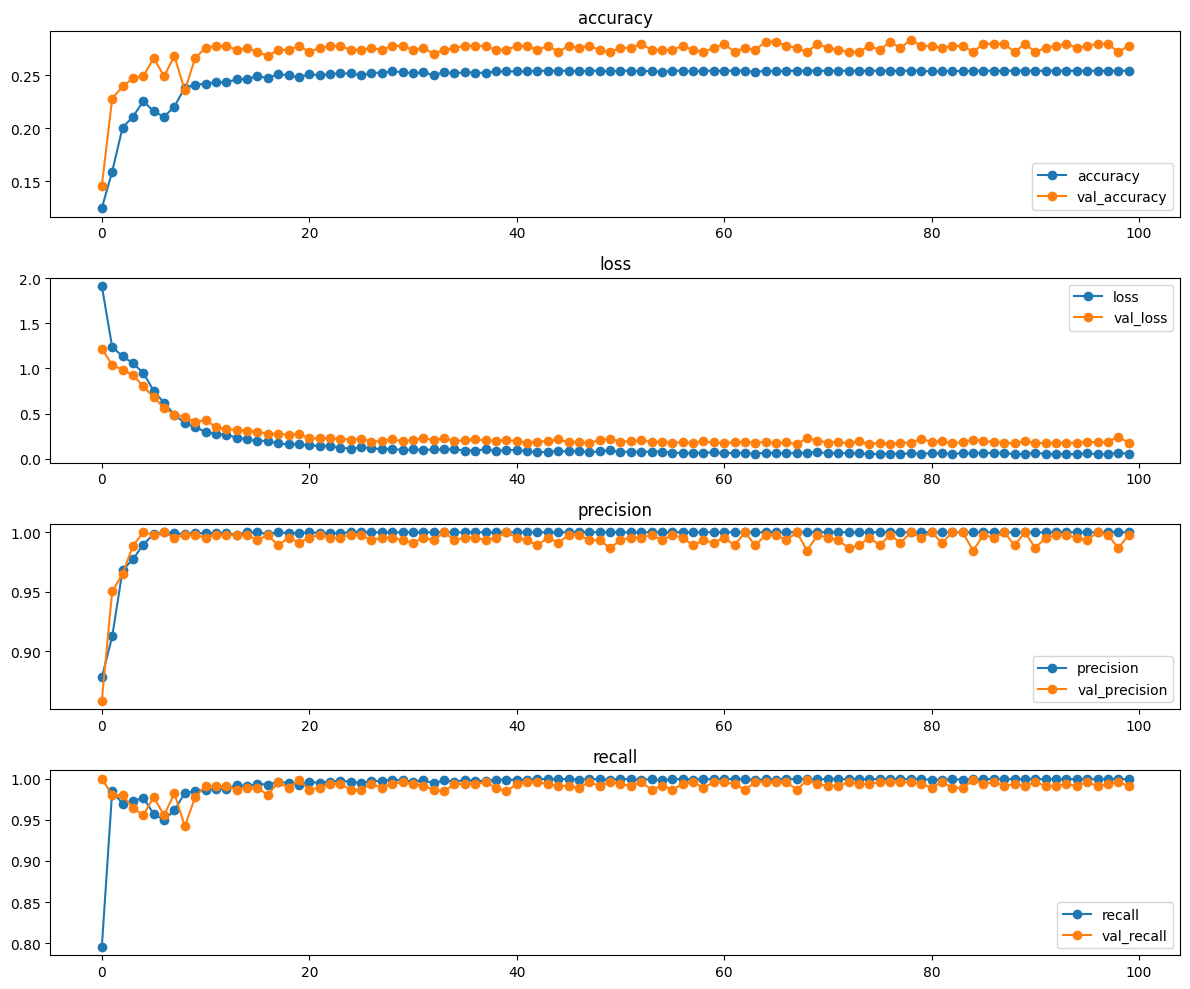

In [ ]:
# Call the custom function
plot_history(history)


I have notcied that in some cases, the presence of a sudden drop of the recall at the beginning, during the first epochs. This comes from the use of the tanh activation function that is being origin of vanishing gradient.

**Tanh, a zero-centered cctivation function is given as:**

$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$

**His respective gradient(derivative):**

$\frac{d}{dx} \tanh(x) = 1 - \tanh^2(x)$

▶ vanishing gradient can occurs when `tanh(x) = 1`

We decided to put the first hidden layer with tanh activation function with the highest number of neurons (`60`). This means the first hidden layer receives large inputs, so it might leads to tanh values close to ±1, thus, leading to very small gradients when backpropagating.

In consequence, this can slow down the learning of our model, especially in earlier layers, making it harder to detect the corrects actual positives.

This is why, in the earlier epoches, we observe that drop how recall metric since recall measures how many of the actual positives were correctly identified.

--------------------------------------------------------------------------------
❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓

**/!\This is not actually the case because I replaced the tanh activation with the ReLu one, still giving that drop of recall. It might come from some initial fluctuations and from the initials weights associated to the neurons./!\**

**Note** : Vizualising the plots of the metrics in function of the epochs, that issue seems to have dissapeared... but came again without changing anything...

❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓❓

In [ ]:
# Evaluate neural network on training data with builtin evaluation
train_result = model4.evaluate(X_train_processed, y_train_encoded, return_dict=True)
train_result

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2739 - loss: 0.0427 - precision: 1.0000 - recall: 0.9988


{'accuracy': 0.2543131113052368,
 'loss': 0.04244568571448326,
 'precision': 1.0,
 'recall': 0.9992711544036865}

In [ ]:
# Evaluate neural network on test data with builtin evaluation
test_result = model4.evaluate(X_test_processed, y_test_encoded,return_dict=True)
test_result

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2853 - loss: 0.1657 - precision: 0.9971 - recall: 0.9893 


{'accuracy': 0.2777777910232544,
 'loss': 0.17410719394683838,
 'precision': 0.9977527856826782,
 'recall': 0.9910714030265808}

In [ ]:
# Let's make the predictions and evaluate our 2nd model

# Predictions
y_pred_test = model4.predict(X_test_processed) # Predict on processed data
y_pred_train = model4.predict(X_train_processed) # Predict on processed data

# Let's make the predictions and evaluate our 1st model

train_mse = mean_squared_error(y_train_encoded, y_pred_train)
test_mse = mean_squared_error(y_test_encoded, y_pred_test)

train_mae = mean_absolute_error(y_train_encoded, y_pred_train)
test_mae = mean_absolute_error(y_test_encoded, y_pred_test)

train_r2 = r2_score(y_train_encoded, y_pred_train)
test_r2 = r2_score(y_test_encoded, y_pred_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
results_df = pd.DataFrame({
    "Metric": ["MSE", "RMSE", "MAE", "R2"],
    "Train": [train_mse, np.sqrt(train_mse), train_mae, train_r2],
    "Test": [test_mse, np.sqrt(test_mse), test_mae, test_r2]
})

print(results_df.to_string(formatters={'Train': '{:.4f}'.format, 'Test': '{:.4f}'.format}))

  Metric  Train   Test
0    MSE 0.0051 0.2411
1   RMSE 0.0715 0.4910
2    MAE 0.0424 0.1741
3     R2 0.9987 0.9344


The same issues were persisting along all the models😞:

* Presence of a slight overfitting due to the higher validation loss and accuracy compared to training loss and accuracy after a certain number of epochs (≈ 12 epochs).
* Low accuracy in spite of high precision, recall, $R^2$-score and of low loss.
* Presence of a gap between training accuracy and validation accuracy on the accuracy vs epochs plots (sign of poor prediction model).

Despite, let's now take the model that gives the best results in terms of the metrics values and by vizualizing the plots. The best model we have got so far, is the **Model 4 with first layer having tanh activation function** after trying a lot.

**Model 4 with first layer having tanh activation function**

  **Performances results of our model :**

**With loss, accuracy, recall and F1-score model's evaluation metrics :**

**Training set :**

* **accuracy:** `0.25367411971092224 = 25.36%`
* **loss:** `0.060807447880506516 = 6.08%`
* **precision:** `1.0 = 100%` => sign of overfitting model
* **recall:** `0.9985422492027283 = 99.85%`

**Testing set :**

* **accuracy:** `0.27586206793785095 = 27.58%`
* **loss:** `0.16507229208946228 = 16.51%`
* **precision:** `0.9977477192878723 = 99.77%`
* **recall:** `0.9888392686843872 = 98.88%`

Overall, these metrics values justify the overfitting observed on the plots because we have `100%` training precision and high training recall of `99.85%`, but very lower precision of `99.77%` and recall with `98.88%` on the validation/test set, this implies some sign of overfitting like the previous models. This alone is not a strong sign of overfitting, since the model is still performing very well.

However, the loss metric is the main topic to be talked about because it has significantly increased between in the testing part of the model from `6.08%` to `16.51%`. Indeed, while the precision and recall remain high on both the training and test sets, the significant increase in loss (from 6.08% to 16.51%) suggests overfitting. Thus, this indicates that the model is making less confident predictions on unseen data, despite maintaining strong classification accuracy

Let's use some other evaluations metrics to highlight the overfitting:

**With MSE, RMSE, MAE and $R^2$ model's evaluation metrics :**


**Training set :**
* MSE : `0.0053`
* RMSE : `0.0885`
* MAE : `0.0608`
* $R^2$ : `0.9980` ➡ almost equals to 1, our model does a good job on the training set


**Testing set :**

* MSE : `0.2044`
* RMSE : `0.4521`
* MAE : `0.1651`
* $R^2$ : `0.9444`

By comparing those metrics with the model 4 will support and reinforce the previous facts disscussed with precision, recall, F1-score metrics.

We can observe that our model is performing well at predicting correct classes of obesity in the training set than on the testing test and unseen obesity's data. As a matter of fact, the Mean Squared Error (MSE), the Root Mean squared Deviation (RMSE) and the Mean Absolute Error (MAE) are very low compared to the testing set ones showing much large predictions errors. In particular with MSE and RMSE but MAE is also quite low, meaning the model's predictions are very close to actual values. As a result, this jusitfy the model's overfitting.

Nevertheless, the R2 score is higher on the training set (`0.9980`) than on the validation set(`0.9444`) which indicate our overfitting model case.

Those amplify what we have seen with the loss, accuracy, recall and F1-score model's evaluation metrics.

---

**Let's now compare with the Neural Network model 3 :**


** Third model Training set :**

* **accuracy:** `0.2523961663246155 = 25.23%`
* **loss:** `0.039220184087753296 = 3.92 %`
* **precision:** `1.0 = 100%`
* **recall:** `0.9970845580101013 = 99.70%`

**Fourth model Training set :**

* **accuracy:** `0.25367411971092224 = 25.36%`
* **loss:** `0.060807447880506516 = 6.08%`
* **precision:** `1.0 = 100%` => sign of overfitting model
* **recall:** `0.9985422492027283 = 99.85%`



| **Metric**  | **Model 3 (Third Model Testing Set)** | **Model 4 (Fourth Model Testing Set)** |
|------------|----------------------------------|----------------------------------|
| **Accuracy**  | `27.58%` (`0.2759`) | `27.58%` (`0.2759`) |
| **Loss**  | `28.11%` (`0.2811`) | `16.51%` (`0.1651`) |
| **Precision**  | `99.55%` (`0.9955`) | `99.77%` (`0.9977`) |
| **Recall**  | `99.11%` (`0.9911`) | `98.88%` (`0.9888`) |

---

This table makes it **easier to compare** the two models' performance.  

Based on the test sets, we can observe that both Neural Network model gives the same accuracy of `27.58%` and they have close level of precision and recall which are very high, those are sign that both models are very good. Indeed, as disscussed before with the model 1, high recall and high precision imply fewer false negatives and fewer false positives ➡ the models is making accurate positive predictions while missing very few real true positives.

However, the loss decreased considerably making the model better because we know that the loss is a measure of how good our model's outcomes predictions are. In other words, the loss function in machine learning is a mathematical function that quantifies the difference between a model's predicted outputs and the actual target values in a given dataset. Consequently, the model 4 is subject of better performance and making less errors.

So, model 3 is worse at making correct predictions than the model 4. If we have to chose one it would be the model 4.

**With MSE, RMSE, MAE and $R^2$ model's evaluation metrics :**

** Third model Training set :**

* MSE : `0.0392`
* RMSE : `0.1980`
* MAE : `0.1543`
* $R^2$ : `0.9897`


** Fourth model Training set :**
* MSE : `0.0053`
* RMSE : `0.0885`
* MAE : `0.0608`
* $R^2$ : `0.9980`


** Third model Testing set :**

* MSE : `0.2988`
* RMSE : `0.5467`
* MAE : `0.3121`
* $R^2$ : `0.9187`

** Fourth model Testing set :**

* MSE : `0.2044`
* RMSE : `0.4521`
* MAE : `0.1651`
* $R^2$ : `0.9444`

Let's compare the **third model** and **fourth model** on the **testing set**, we can see that the fourth model performs better across all metrics:

| Metric  | Third Model  | Fourth Model |
|---------|------------|------------|
| **MSE**  | **0.2988**  | **0.2044**  |
| **RMSE** | **0.5467**  | **0.4521**  |
| **MAE**  | **0.3121**  | **0.1651**  |
| **$R^2$** | **0.9187**  | **0.9444**  |

(I didn't know we can vizualise the values in this shape)

The fourth model has lower errors (MSE, RMSE, MAE) and a higher ($R^2$) score. So, we can say

The $R^2$ is already a good metric to say it's

Then let's be the be **Model 4 with first layer having tanh activation function**, the winner (not really in terms of accuracy...🤡).




## **5. Comparaison : Classical Machine learning vs Neural Network deep learning**
### **1. Overall overview.**

During this project, we have used the following models :

* XGBoost Classifier: A gradient boosting ensemble (trees) method.
* K-Nearest Neighbors (KNN): An distances-based learning algorithm.
* Several Neural Network (Keras Sequential): A multi-layered perceptron model.

**Model Comparison**

Let's analyze each model based on the results we have gotten until now:

**1. XGBoost (eXtreme Gradient Boosting)**


* High overall accuracy on both training and testing sets.
* High precision, recall, and F1-score for most classes.
* The confusion matrix shows that XGBoost made very few misclassifications in most cases, which is excellent and sometimes almost perfect.
* May have overfitting issues due to the high values of corrects predictions.


**2. K-Nearest Neighbors (KNN)**


* High accuracy on the training set but lower overall accuracy on the test set compared to XGBoost.
* Good precision or recall for some obesity level classes but lower precision and F1-Score than XGBoost.
* The confusion matrix reveals several significant misclassifications especially for the Normal Weight.

We have deduced that it is not well suited to multi-class classification with large dataset implying expansive computational costs ➡ **K-NN is already out of the game.**

So it will be a battle between the XGBOOST model and the Neural Network model.

**3. Neural Network (Keras Sequential)**


* Very high precision and recall on both the training and testing sets.
* Very low loss for both test and training data, with a slight overfitting.
* Very poor overall accuracy compared to XGBoost and even K-NN.
* Higher validation loss than the training loss after nearly 12 epochs. ➡ small overfitting behavior of our model


Let's go more in depth in comparing the deep learning Neural Network model and the classical machine learning model XGBOOST :



### **2. XGBOOST vs Neural Network model.**

<Figure size 1600x800 with 0 Axes>

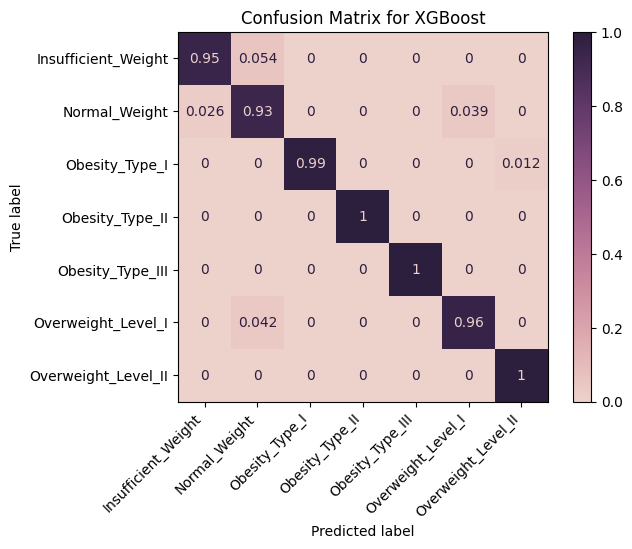

                     precision    recall  f1-score   support

Insufficient_Weight       0.97      0.95      0.96        74
      Normal_Weight       0.91      0.93      0.92        76
     Obesity_Type_I       1.00      0.99      0.99        85
    Obesity_Type_II       1.00      1.00      1.00        82
   Obesity_Type_III       1.00      1.00      1.00        77
 Overweight_Level_I       0.96      0.96      0.96        71
Overweight_Level_II       0.98      1.00      0.99        57

           accuracy                           0.98       522
          macro avg       0.97      0.98      0.97       522
       weighted avg       0.98      0.98      0.98       522



In [ ]:
# @title Reminder of the XGBOOST confusion matrix and its metrics

# Plot the confusion matrix for XGBoost
plt.figure(figsize=(16, 8))
ConfusionMatrixDisplay.from_estimator(
    model_xgb, X_test_processed, y_test_encoded,
    display_labels = label_encoder.classes_,
    cmap=sns.cubehelix_palette(as_cmap=True),
    normalize='true',)
plt.xticks(rotation=45, ha='right')
plt.title("Confusion Matrix for XGBoost")
plt.show()
# Print the classification report for XGBoost
print(classification_report(y_test_encoded, y_pred_xgb, target_names = label_encoder.classes_))

**Model 4 with first layer having tanh activation function**


**With loss, accuracy, recall and F1-score model's evaluation metrics :**


| **Metric**  | **Training Set** | **Testing Set** |
|------------|----------------|----------------|
| **Accuracy**  | `25.36%` (`0.2537`) | `27.58%` (`0.2759`) |
| **Loss**  | `6.08%` (`0.0608`) | `16.51%` (`0.1651`) |
| **Precision**  | `100%` (`1.0000`) | `99.77%` (`0.9977`) |
| **Recall**  | `99.85%` (`0.9985`) | `98.88%` (`0.9888`) |

**With MSE, RMSE, MAE and $R^2$ model's evaluation metrics :**

| **Metric**  | **Training Set** | **Testing Set** |
|------------|----------------|----------------|
| **MSE**  | `0.0053` | `0.2044` |
| **RMSE**  | `0.0885` | `0.4521` |
| **MAE**  | `0.0608` | `0.1651` |
| **R² (R-squared)**  | `0.9980` | `0.9444` |


Here’s your **XGBoost training and testing metrics** in table format for better clarity:  

| **Metric**  | **Training Set** | **Testing Set** |
|------------|----------------|----------------|
| **Accuracy**  | `1.000` | `0.9751` |
| **Recall (Insufficient_Weight)** | `1.000` | `0.946` |
| **Recall (Normal_Weight)** | `1.000` | `0.934` |
| **Recall (Obesity_Type_I)** | `1.000` | `0.988` |
| **Recall (Obesity_Type_II)** | `1.000` | `1.000` |
| **Recall (Obesity_Type_III)** | `1.000` | `1.000` |
| **Recall (Overweight_Level_I)** | `1.000` | `0.958` |
| **Recall (Overweight_Level_II)** | `1.000` | `1.000` |
| **Precision (Insufficient_Weight)** | `1.000` | `0.972` |
| **Precision (Normal_Weight)** | `1.000` | `0.910` |
| **Precision (Obesity_Type_I)** | `1.000` | `1.000` |
| **Precision (Obesity_Type_II)** | `1.000` | `1.000` |
| **Precision (Obesity_Type_III)** | `1.000` | `1.000` |
| **Precision (Overweight_Level_I)** | `1.000` | `0.958` |
| **Precision (Overweight_Level_II)** | `1.000` | `0.983` |
| **F1-Score (Insufficient_Weight)** | `1.000` | `0.959` |
| **F1-Score (Normal_Weight)** | `1.000` | `0.922` |
| **F1-Score (Obesity_Type_I)** | `1.000` | `0.994` |
| **F1-Score (Obesity_Type_II)** | `1.000` | `1.000` |
| **F1-Score (Obesity_Type_III)** | `1.000` | `1.000` |
| **F1-Score (Overweight_Level_I)** | `1.000` | `0.958` |
| **F1-Score (Overweight_Level_II)** | `1.000` | `0.991` |


Based on the differents metrics, as for the Neural Network model, it appears that the XGBoost model is likely **overfitting**, although it's performing very well overall. Indeed, this is the case because of the perfect (`100 %`) score for all the differents metrics along all the obesity's categories and then we observe very small drop out of the model performance on the test set (with the unseen data). This is caracteristic of overfitting.

On the test set, both models have very high precisions close to `1` :

All obesity classes for the XGBOOST model are very high and close to `1` looking at the table of metrics values and the Neural Network might have a very slightly higher precision of `99.77%` (`0.9977`) tough. So in terms of precision they are in rude competion.

Same reasonning with the recall metric.

Nevertheless, we can clearly see that XGBOOST is the best model for the obesity dataset by looking at the accuracy metric which outperform our Neural Network model in every sides.




## **Conclusion**


The XGBoost classical machine learning model is the best-performing for this obesity dataset and multi class classification. Indeed, it has the highest overall accuracy, high precision and recall across all classes, and its confusion matrix demonstrates that it makes very few prediction errors.
It's the model that learns the better this obesity dataset and gives the predictions for the medical staff to study the raising obesity issue arround the entire world. In fact, this health conditions can leads to several health complications because of the fat cells accumulations in the body like high cholestérol leading itself to heart diseases and increase the risk of coronary artery disease for example.

---

**For further improvements :**

XGBOOST model is a classical machine learning model but is subject of better performance than the Neural Network model. It can be even improved more by using key model hyperparameters tuning like GridSearchCV and by regularizations L1/L2.

We could also use these acompanied with batch normalizations in order to prevents our overfitting Neural Network model and improve the bad accuracy.

**Note:**

 Perhaps, it would have been better to use ordinal encoder instead of label encoder instead ot the label encoder  since the presence of a certain order of obesity level. It could have bring some better results and improvements.
